# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
import numpy as np
import pandas as pd

#Libraries to help in visualization of data
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To supress numerical display in scientific notations
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

#for Shapiro-Wilk test.
from scipy.stats import shapiro

import pylab
import scipy.stats as stats

## Loading the dataset

In [4]:
#loading the dataset, used_device_data.csv as udata
udata = pd.read_csv('used_device_data.csv')

## Data Overview

- Observations
- Sanity checks

In [5]:
#Taking a glance at the data, udata, randomely so as to get a fair idea of how the data actually is.
udata.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.00,5.00,64.00,3.00,3020.00,146.00,2020,127,4.31,4.72
1,Honor,Android,17.30,yes,yes,13.00,16.00,128.00,8.00,4300.00,213.00,2020,325,5.16,5.52
2,Honor,Android,16.69,yes,yes,13.00,8.00,128.00,8.00,4200.00,213.00,2020,162,5.11,5.88
3,Honor,Android,25.50,yes,yes,13.00,8.00,64.00,6.00,7250.00,480.00,2020,345,5.14,5.63
4,Honor,Android,15.32,yes,no,13.00,8.00,64.00,3.00,5000.00,185.00,2020,293,4.39,4.95


In [6]:
#looking at the shape of the data.
udata.shape

(3454, 15)

In [7]:
#checking for duplicates
udata.duplicated().sum()

0

Observation: 1. There are no duplicates in the dataset.

In [8]:
#looking at column datatypes and number of non-null values
udata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

Observations: 1. The are missing values in 6 columns and there are 9 float64, 4 Object and 2 int64 types. 3. 

The following columns have missing data, weight, battery, ram, int_memory, selfie_camera_mp and main_camera_mp

In [9]:
#looking at the summary of the dataset, udata, displaying the variables
udata.describe(include ="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.00,NaN,NaN,NaN,13.71,3.81,5.08,12.70,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.00,NaN,NaN,NaN,9.46,4.82,0.08,5.00,8.00,13.00,48.00
selfie_camera_mp,3452.00,NaN,NaN,NaN,6.55,6.97,0.00,2.00,5.00,8.00,32.00
int_memory,3450.00,NaN,NaN,NaN,54.57,84.97,0.01,16.00,32.00,64.00,1024.00
ram,3450.00,NaN,NaN,NaN,4.04,1.37,0.02,4.00,4.00,4.00,12.00
battery,3448.00,NaN,NaN,NaN,3133.40,1299.68,500.00,2100.00,3000.00,4000.00,9720.00


UNIVARIATE ANALYSIS
4.36

In [10]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


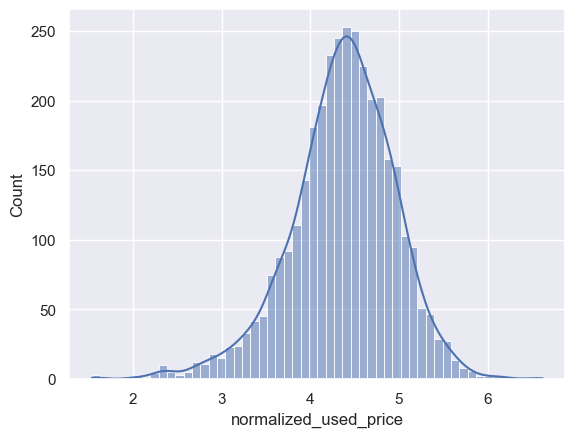

In [11]:

# Plot the histogram
sns.histplot(udata, x="normalized_used_price", kde=True)
plt.show()





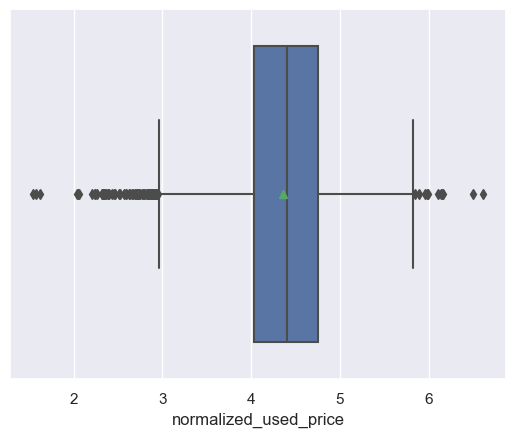

In [12]:
#A boxplot on normalized _used_price
sns.boxplot(udata, x="normalized_used_price",showmeans = True)
plt.show()

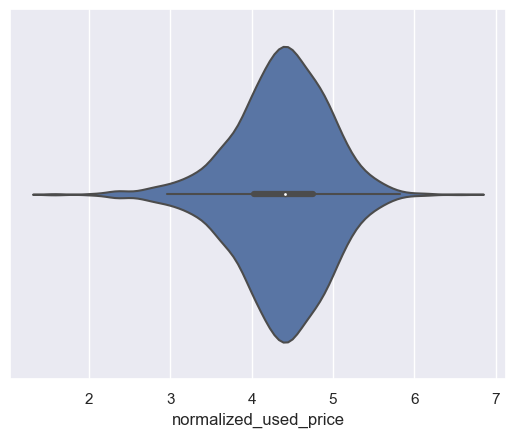

In [13]:
#violinplot of normalized_used_price
sns.violinplot(udata, x ='normalized_used_price')
plt.show()

Observations: The distribution is a faily evenly distributed and the mean price for a used Phone is 4.36 There are also outliers present.

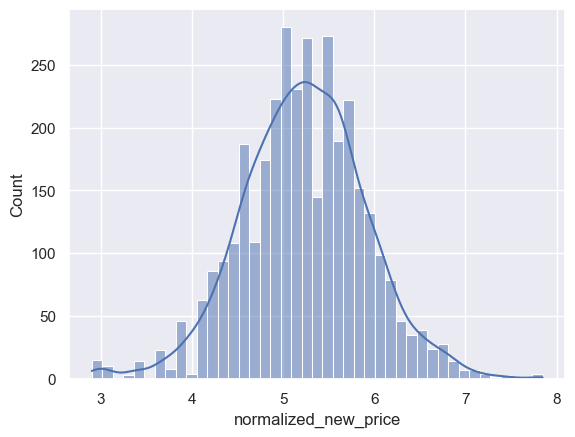

In [14]:
sns.histplot(udata, x="normalized_new_price",  kde =True)
plt.show()

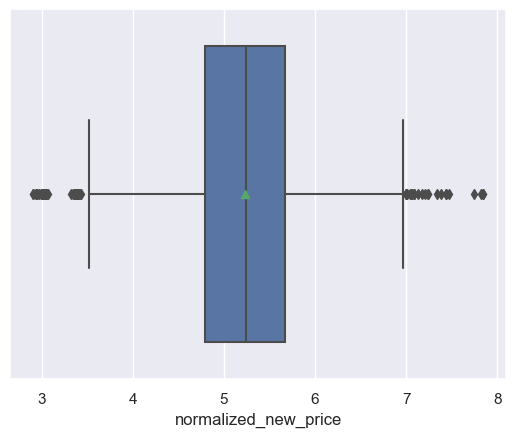

In [15]:
sns.boxplot(udata, x="normalized_new_price",showmeans = True)
plt.show()

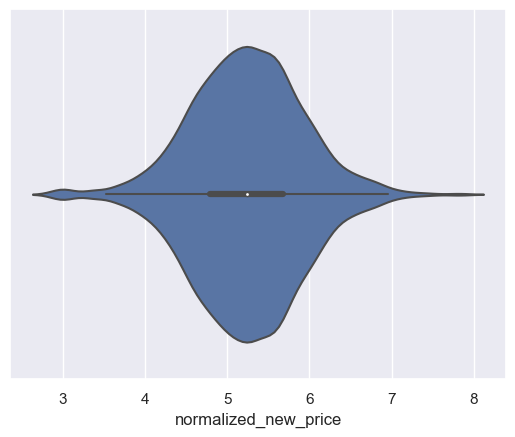

In [16]:
#violinplot of normalized_new_price
sns.violinplot(udata, x ='normalized_new_price')
plt.show()

Observations: The distribution is a faily distributed and there are outliers present

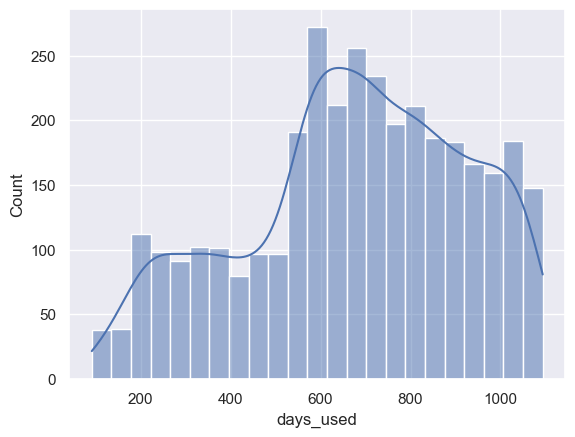

In [17]:
sns.histplot(udata, x="days_used",  kde =True)
plt.show()

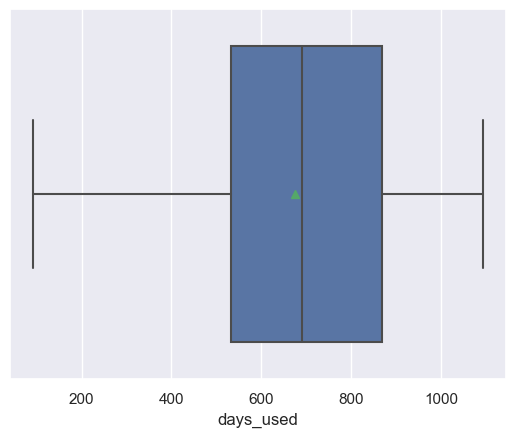

In [18]:
sns.boxplot(udata, x="days_used",showmeans = True)
plt.show()

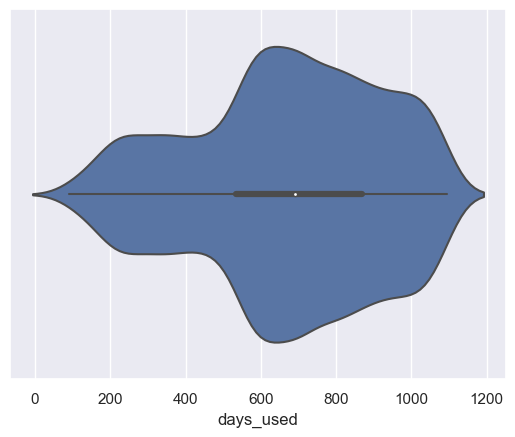

In [19]:
#violinplot of days_used.
sns.violinplot(udata, x ='days_used')
plt.show()

Observations: The distribution is skewed to the left and The are no outliers present. The mean number of days used for a phone is about 670 days

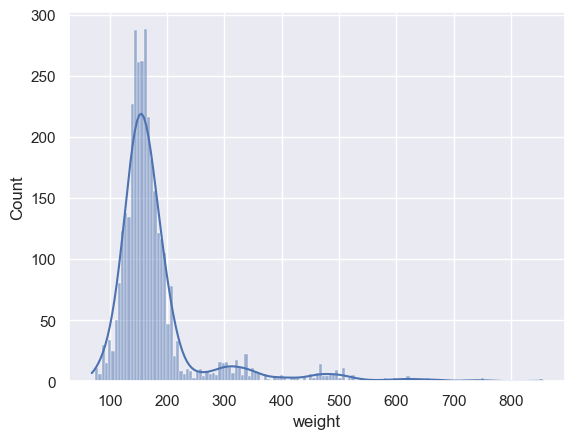

In [20]:
sns.histplot(udata, x="weight",  kde =True)
plt.show()

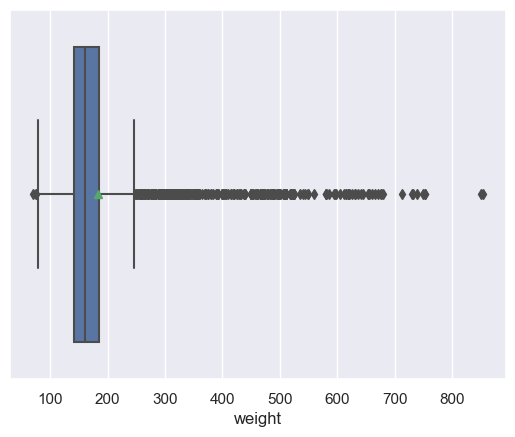

In [21]:
sns.boxplot(udata, x="weight",showmeans = True)
plt.show()

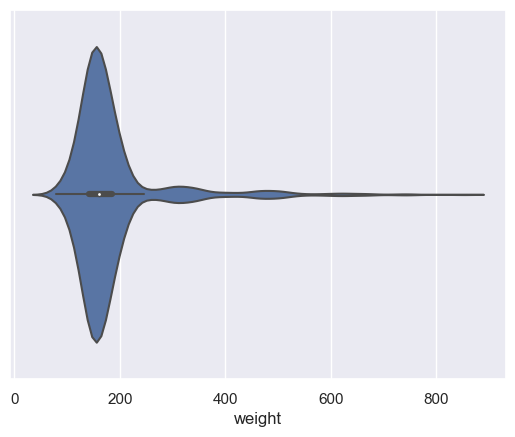

In [22]:
#violinplot of weight.
sns.violinplot(udata, x ='weight')
plt.show()

Observations: The distribution is highly skewed to the right and There are outliers present. The mean weight for the phones is about 180g

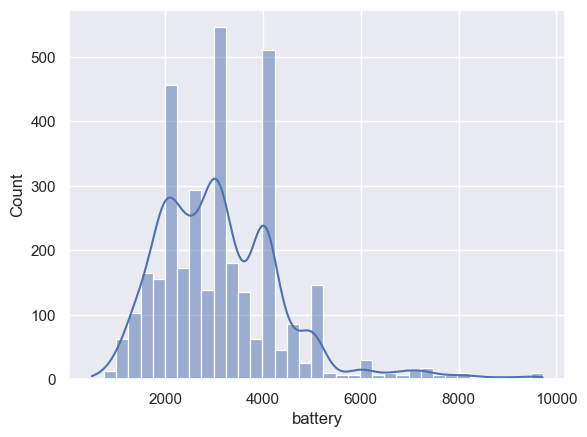

In [23]:
sns.histplot(udata, x="battery",  kde =True)
plt.show()

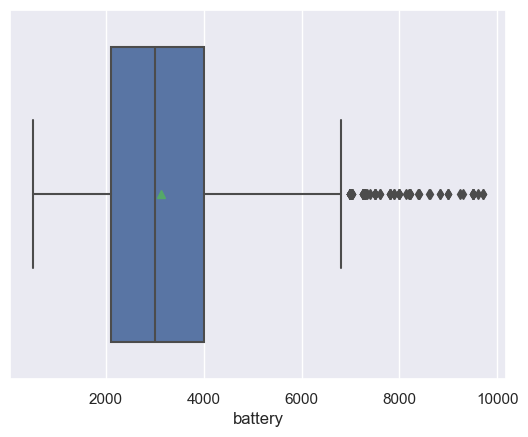

In [24]:
sns.boxplot(udata, x="battery",showmeans = True)
plt.show()

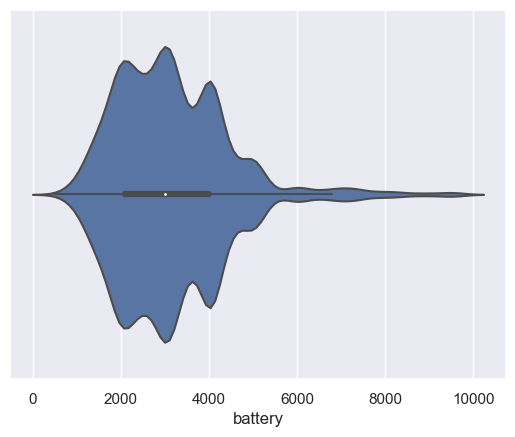

In [25]:
#violinplot of battery.
sns.violinplot(udata, x ="battery")
plt.show()

Observations: The distribution is skewed to the right and There are outliers present.The mean capacity of the batteries for the phones is about 3100mAh 

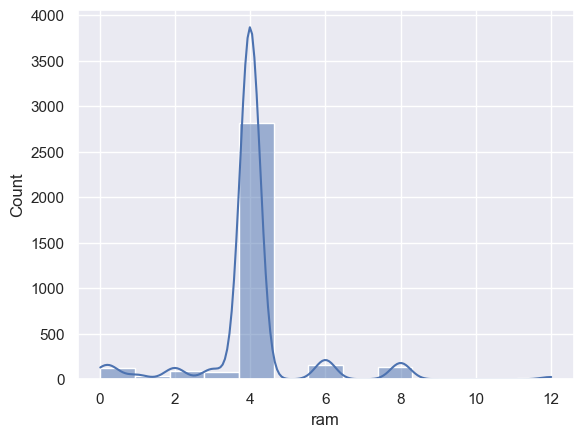

In [26]:
sns.histplot(udata, x="ram",  kde =True)
plt.show()

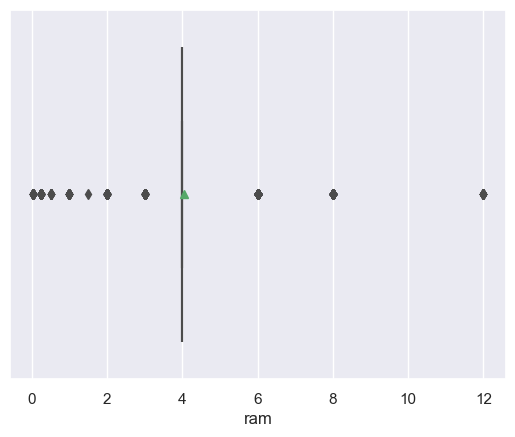

In [27]:
sns.boxplot(udata, x="ram",showmeans = True)
plt.show()

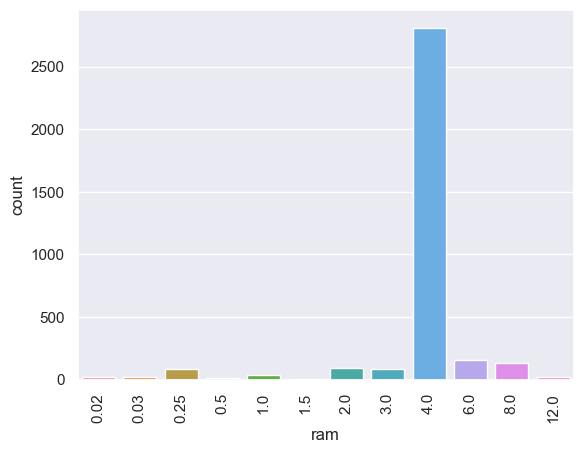

In [28]:
#countplot of ram.
sns.countplot(udata, x ="ram")
plt.xticks(rotation=90)
plt.show()

Observations:The distribution is skewed to the right and there are outliers present.The mean capacity of ram for the phones is about 4GB 

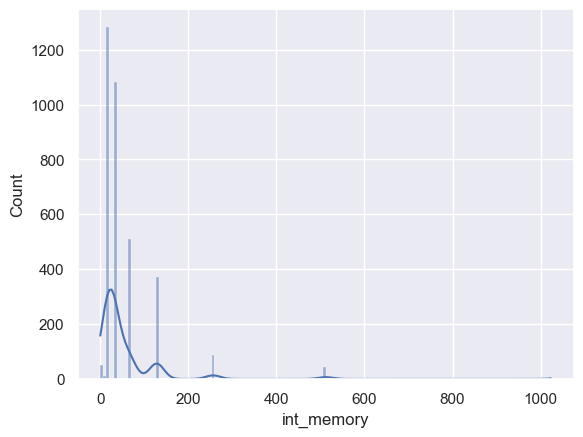

In [29]:
sns.histplot(udata, x="int_memory",  kde =True)
plt.show()

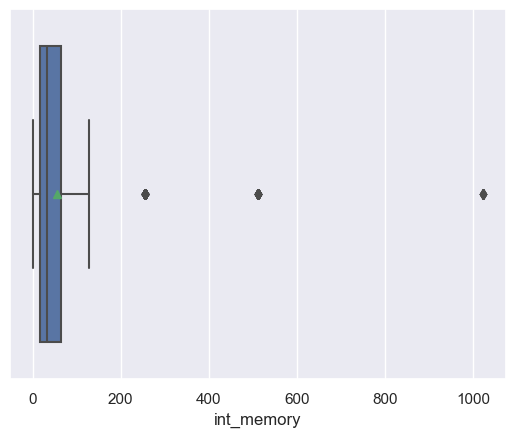

In [30]:
sns.boxplot(udata, x="int_memory",showmeans = True)
plt.show()

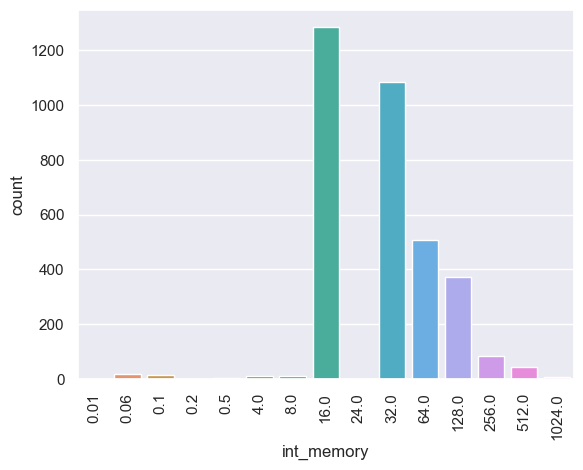

In [31]:
#countplot of int_memory.
sns.countplot(udata, x ="int_memory")
plt.xticks(rotation=90)
plt.show()

Observations:The distribution is skewed to the right and there are outliers present.The mean capacity of ram for the phones is about 54GB.

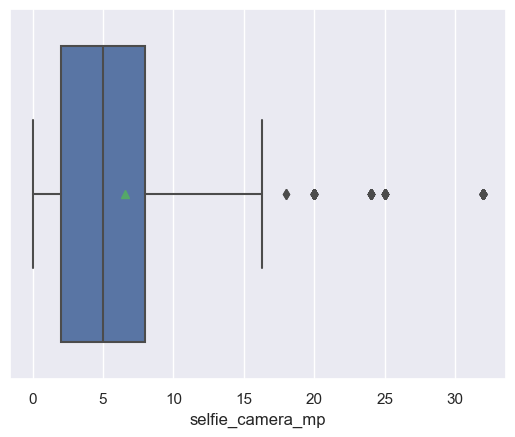

In [32]:
sns.boxplot(udata, x="selfie_camera_mp",showmeans = True)
plt.show()

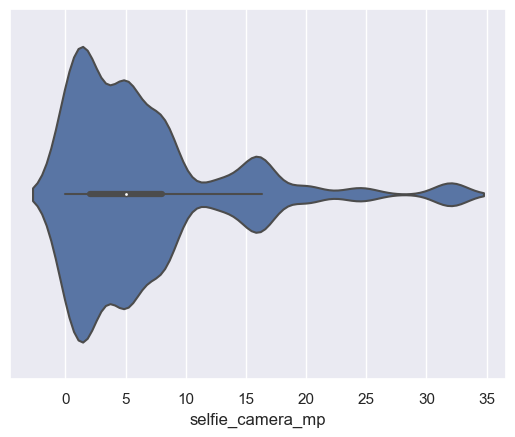

In [33]:
#violinplot of selfie_camera_mp.
sns.violinplot(udata, x ="selfie_camera_mp")
plt.show()

Observations: The distribution is skewed to the right and there are outliers present.The mean Resolution of the Selfie camera of the phone is about 6 megapixels.

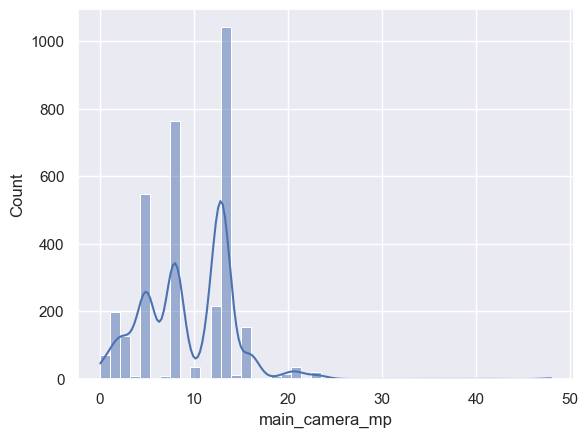

In [34]:
sns.histplot(udata, x="main_camera_mp",  kde =True)
plt.show()

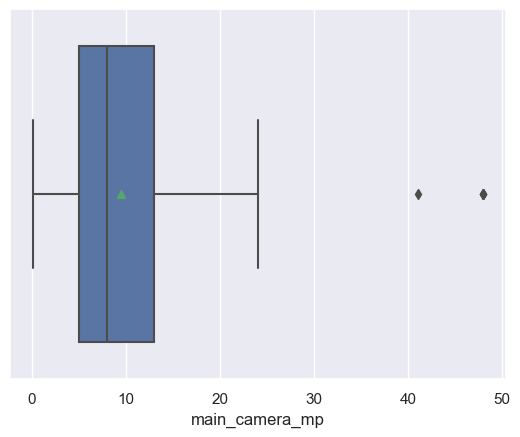

In [35]:
sns.boxplot(udata, x="main_camera_mp",showmeans = True)
plt.show()

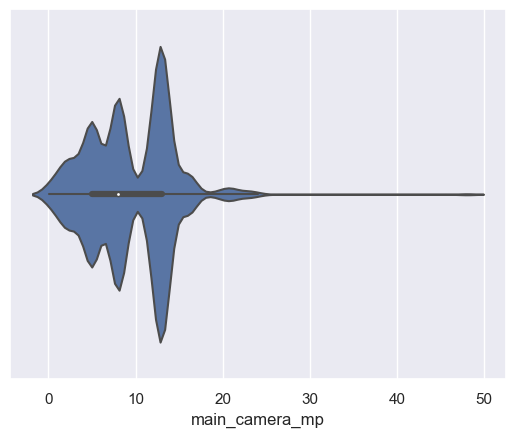

In [36]:
#violinplot of main_camera_mp.
sns.violinplot(udata, x ="main_camera_mp")
plt.show()

Observations:The distribution is skewed to the right and there are outliers present. The mean Resolution of the Main camera of the phone is about 9.

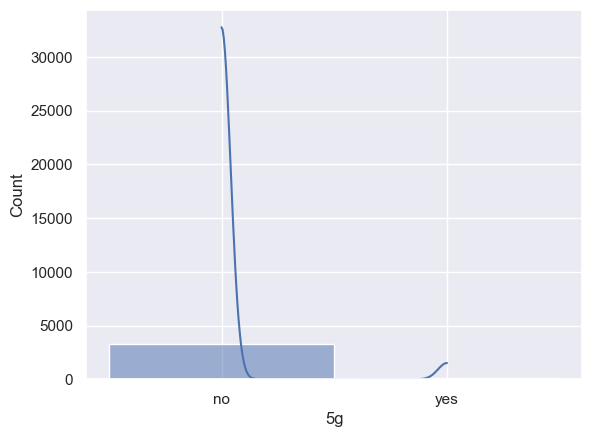

In [37]:
sns.histplot(udata, x="5g",  kde =True,)
plt.show()

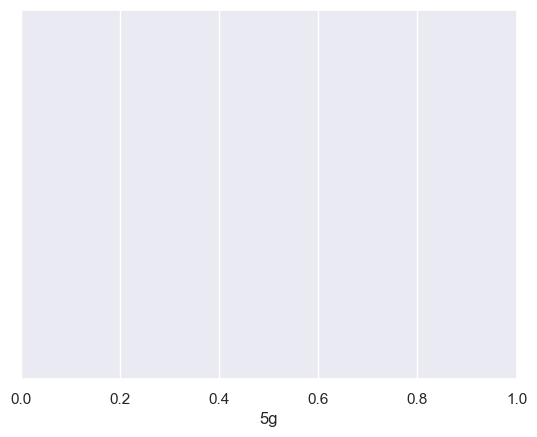

In [38]:
udata["5g"] = pd.to_numeric(udata["5g"], errors='coerce')


sns.boxplot(udata, x="5g",showmeans = True)
plt.show()

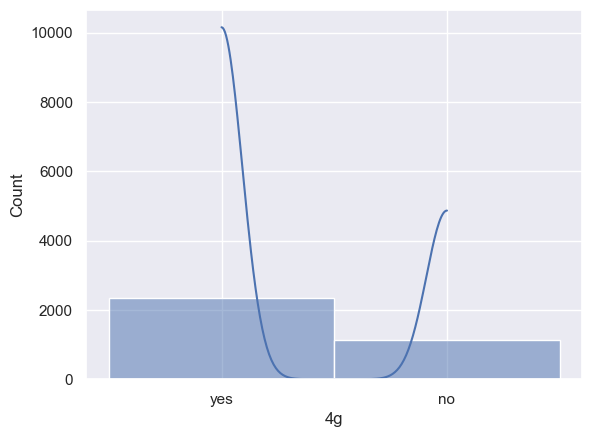

In [39]:
sns.histplot(udata, x="4g",  kde =True)
plt.show()

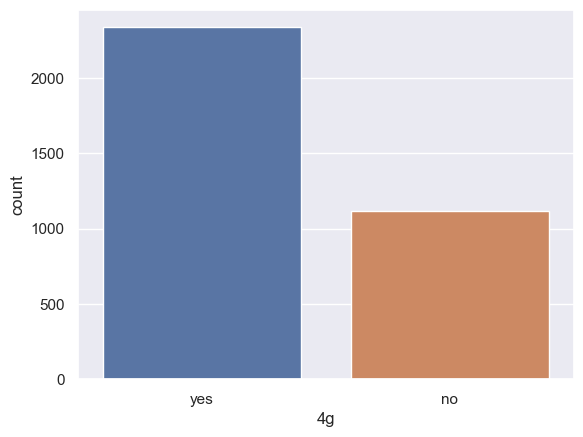

In [40]:
#countplot of 4g.
sns.countplot(udata, x ="4g")
plt.show()

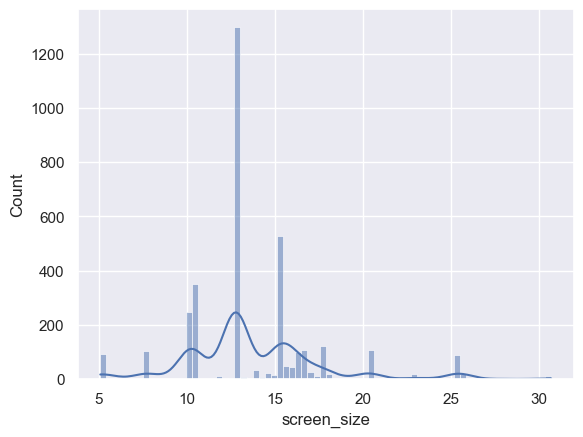

In [41]:
sns.histplot(udata, x="screen_size",  kde =True)
plt.show()

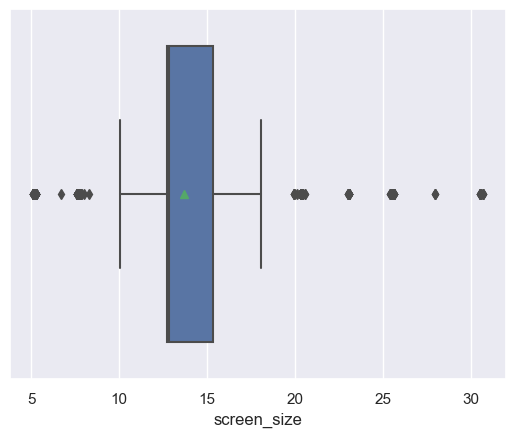

In [42]:
sns.boxplot(udata, x="screen_size",showmeans = True)
plt.show()

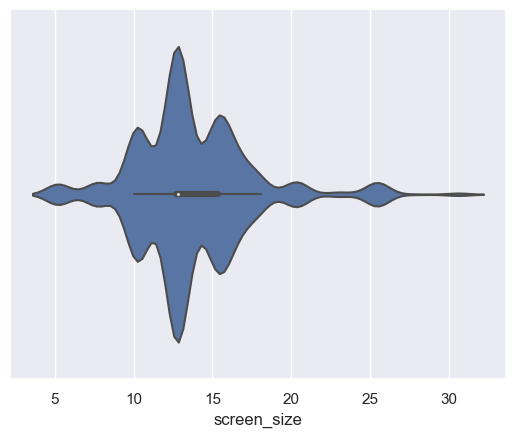

In [43]:
sns.violinplot(udata, x="screen_size")
plt.show()

Observations: The distribution is skewed to the right and there are outliers present. The mean screen size of the phones is about 13cm 4.

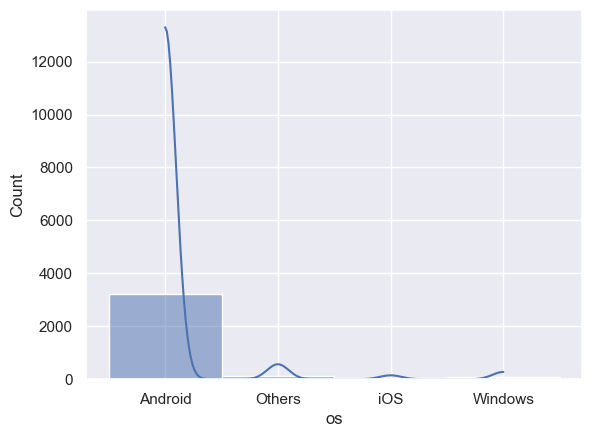

In [44]:
sns.histplot(udata, x="os",  kde =True)
plt.show()

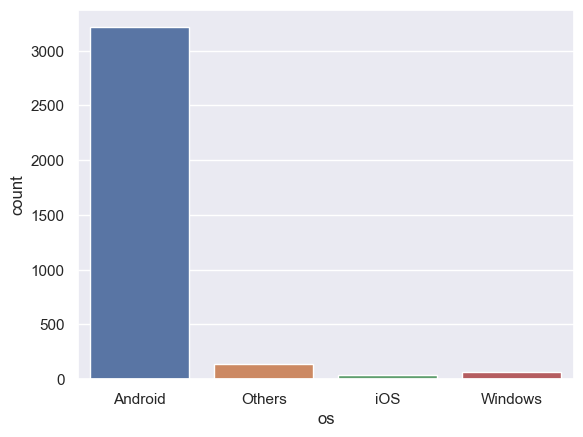

In [45]:
#countplot of os.
sns.countplot(udata, x ="os")
plt.show()

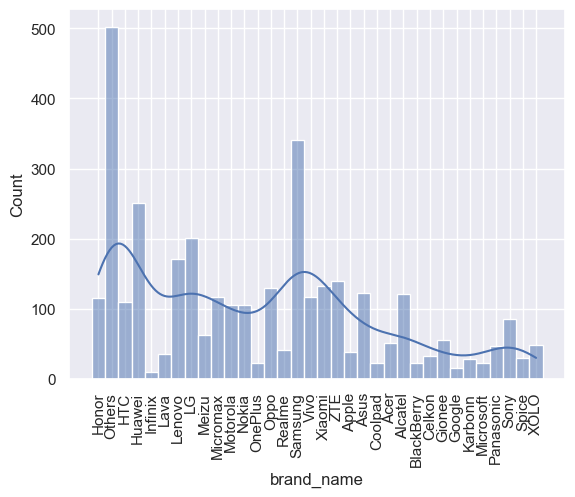

In [46]:
sns.histplot(udata, x="brand_name",kde =True)
plt.xticks(rotation=90)
plt.show()

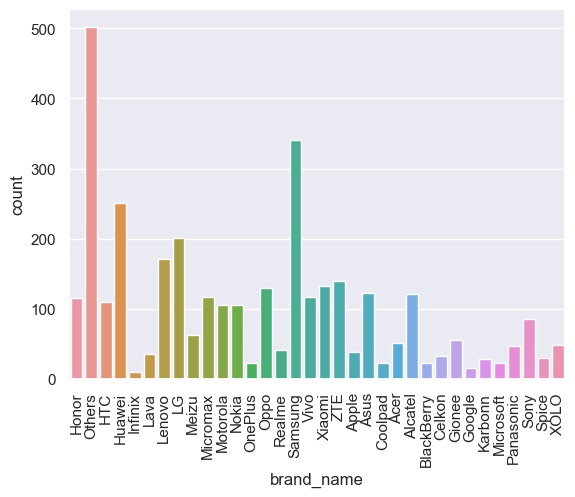

In [47]:
#countplot of brand_name.
sns.countplot(udata, x ="brand_name")
plt.xticks(rotation=90)
plt.show()

Observations: The distribution is skewed to the right and there are no outliers present.The highest number of phones, about 500 are in the category of unknown brand name, categorized as "others". There are 34 categories of phone brands.

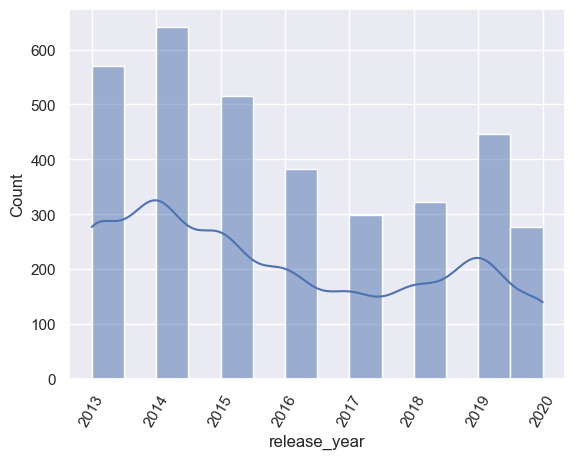

In [48]:
sns.histplot(udata, x="release_year",kde =True)
plt.xticks(rotation=60)
plt.show()

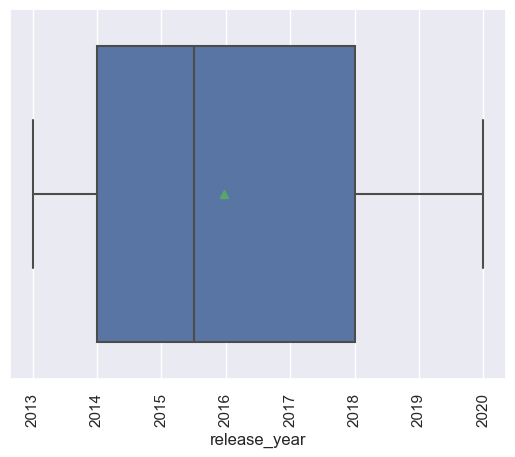

In [49]:
sns.boxplot(udata, x="release_year",showmeans = True)
plt.xticks(rotation=90)
plt.show()

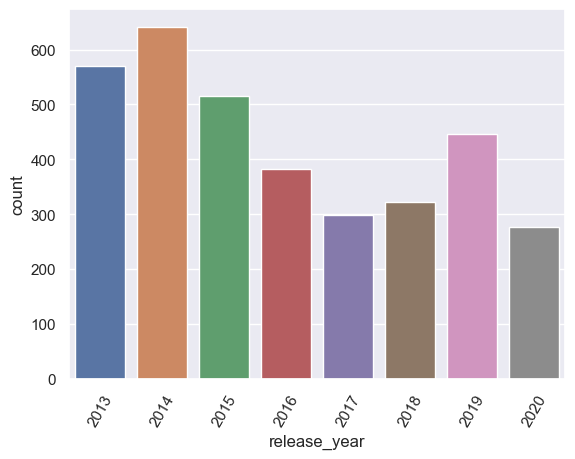

In [50]:
#countplot of release_year.
sns.countplot(udata, x ="release_year")
plt.xticks(rotation=60)
plt.show()

Observations: The distribution is skewed to the right and there are no outliers present.Phones released in 2014 are the majority with about 630 pieces of phones and the least is 2020 with about 280 phones. 4. The years, 2013,2015,2019 and 2016 follows in that order with about 570,510,450 and 380, pieces of phones respectively.

 BIVARIATE ANALYSIS

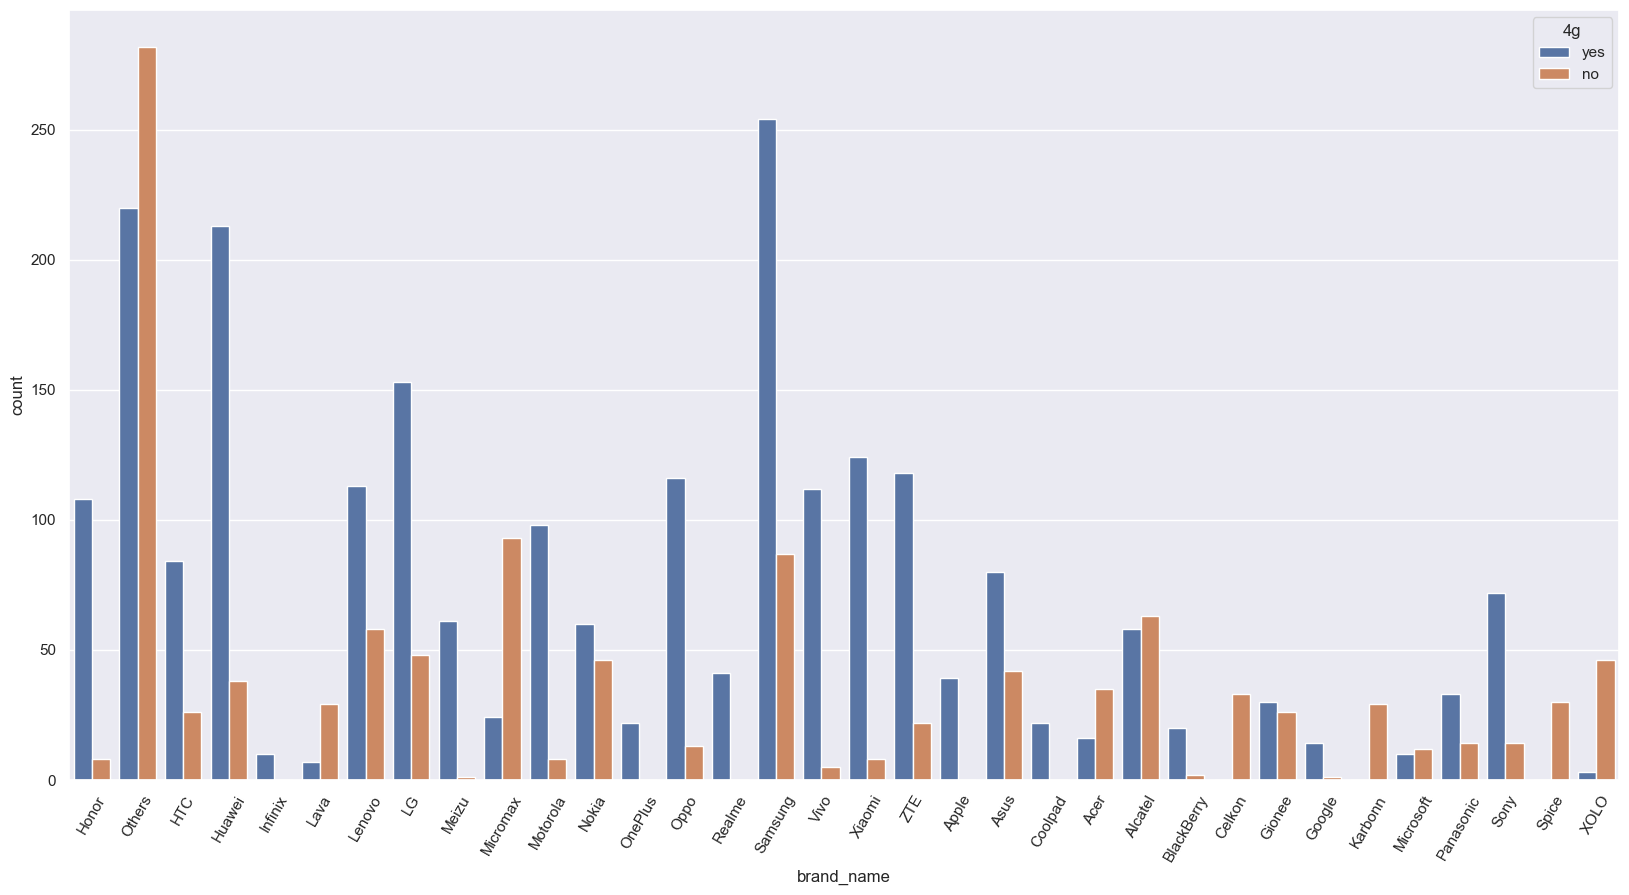

In [51]:
plt.figure(figsize=(20,10))
sns.countplot(udata, x='brand_name', hue= '4g');
plt.xticks(rotation=60)
plt.show()

[nan]


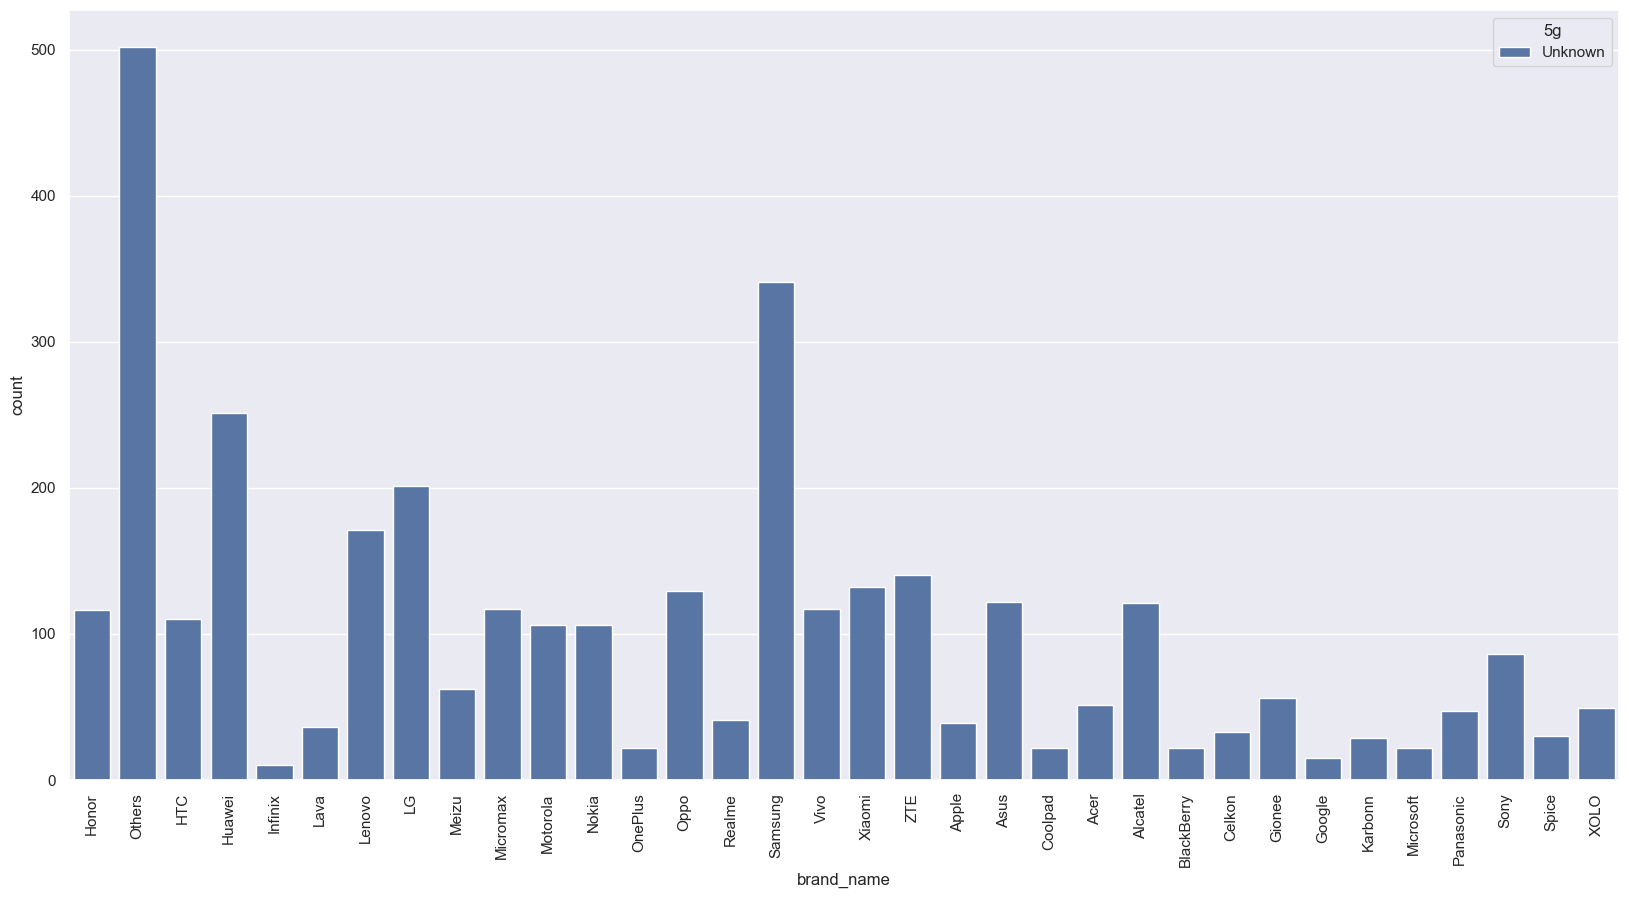

In [134]:

# Filling missing values with a default value (e.g., 'Unknown')
udata['5g'].fillna('Unknown', inplace=True)



plt.figure(figsize=(20,10))
sns.countplot(udata, x='brand_name', hue= '5g');
plt.xticks(rotation=90)
plt.show()

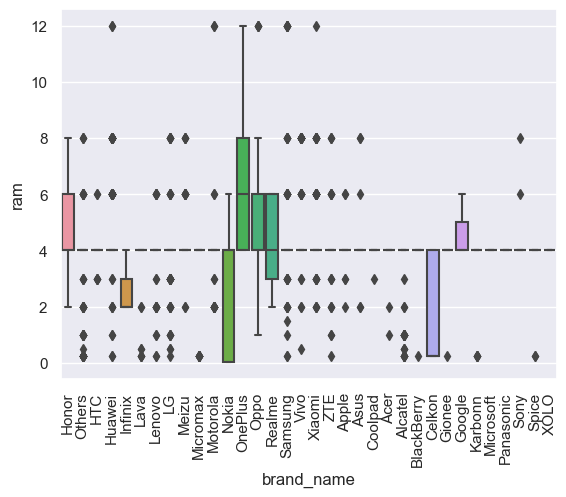

In [53]:
#a boxplot of brand_name and ram
sns.boxplot(udata, x="brand_name", y= "ram")
plt.xticks(rotation=90)
plt.show()

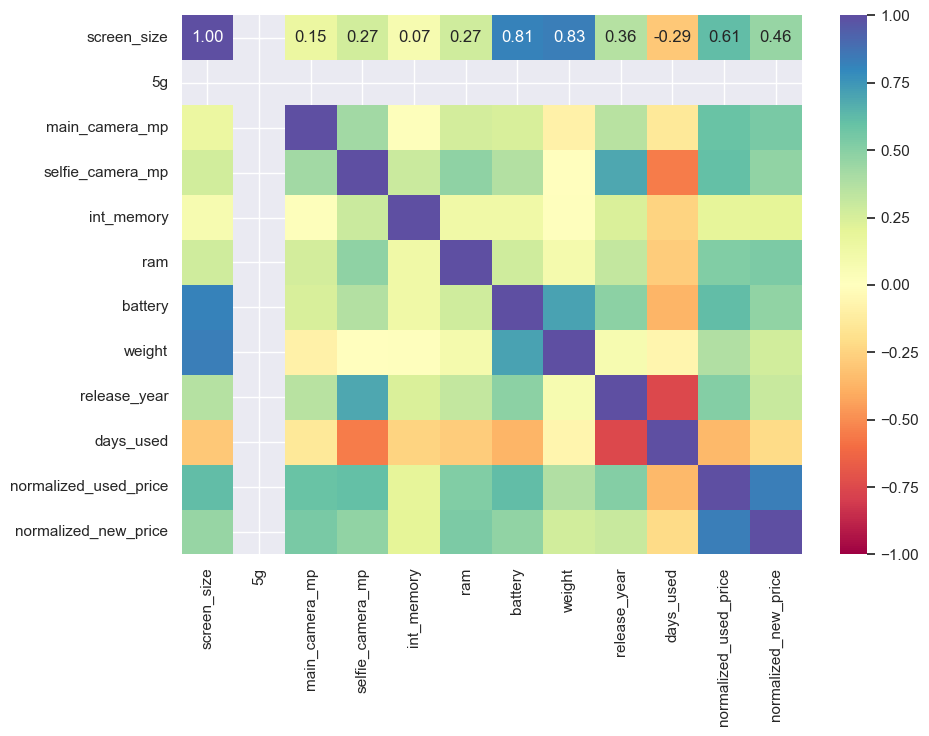

In [54]:
#heatmap fishing out only the numerical categories for this map
numeric_columns = udata.select_dtypes(include=np.number).columns.tolist()

# correlation heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(udata[numeric_columns].corr(),annot=True,vmin=-1,vmax=1,fmt=".2f",cmap="Spectral")
plt.show()

Observations:There is a negative corellation between released year and the days the phone has been used.  There exist strong correlation between screen size and weight and then battery and screen size. and there also exist a correlation between release year and selfie camera mp. Same can be said of normalized used price and battery. There exist a positive correlation between normalized used price and normalized new price. Same can be said of battery and weight. Another positive is main camera mp and both normalized used and new prices. .


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

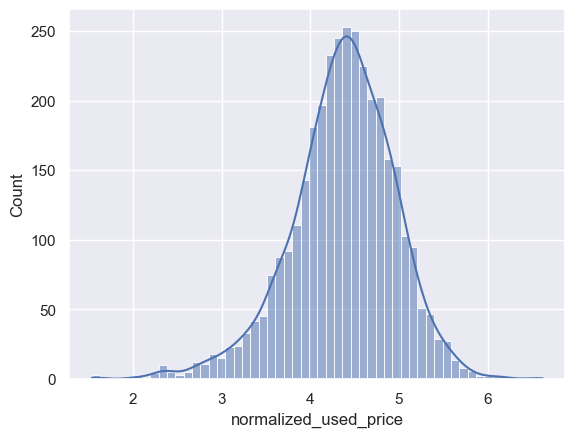

In [55]:
#Question 1
sns.histplot(udata, x="normalized_used_price", kde =True)
plt.show()

In [56]:
normalized_used_price = udata['normalized_used_price']

# Performing the  Shapiro-Wilk test
statistic, p_value = shapiro(normalized_used_price)

# Print the test statistic and p-value
print("Shapiro-Wilk test statistic:", statistic)
print("p-value:", p_value)

Shapiro-Wilk test statistic: 0.9824735522270203
p-value: 2.837554557188224e-20


Observation: 1. After the Shapiro-Wilk test, it is evident that, the p_value is less than 0.05. This confirms that the distributuion is not normal.

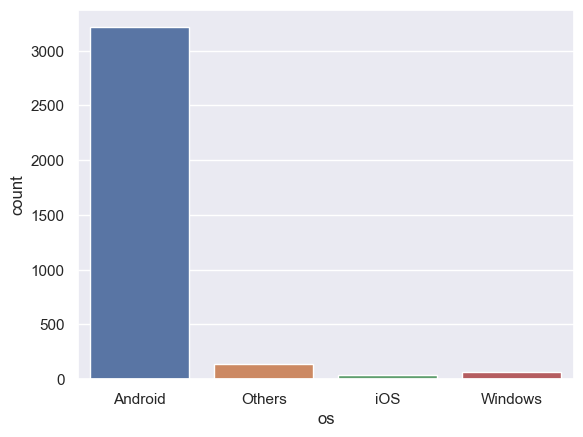

In [57]:
#Q2. What percentage of the used device market is dominated by Android devices?

#countplot of os.
sns.countplot(udata, x ="os")
plt.show()

In [58]:
#looking for the percentages
udata['os'].value_counts(normalize= True)

os
Android   0.93
Others    0.04
Windows   0.02
iOS       0.01
Name: proportion, dtype: float64

Observation: 1. The percentage for Android os is 93%

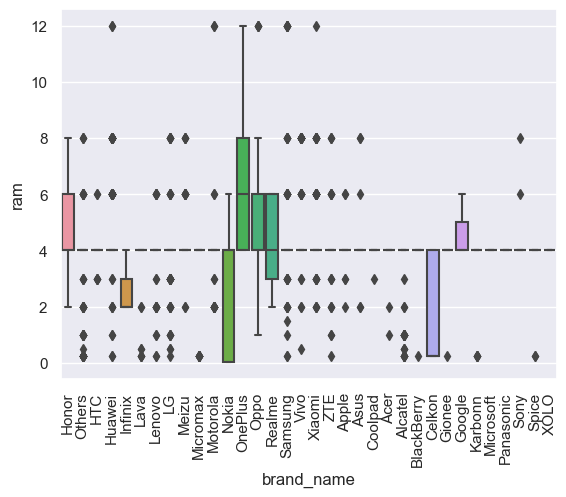

In [59]:
#Q3. How does the amount of RAM vary with the brand?
sns.boxplot(udata, x="brand_name", y= "ram")
plt.xticks(rotation=90)
plt.show()

Observation: Most brands appear to keep there ram space between number 0 to 8 gigabytes. Some brands like google or sony have very few data points but this could be explained by the dominance of Android used cell phone in the marketplace.

In [60]:
#Q4. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
#Filter battery column where energy is above 4500 and create new dataframe, larger_battery
larger_battery = udata[udata.battery > 4500] 
larger_battery.shape

(341, 15)

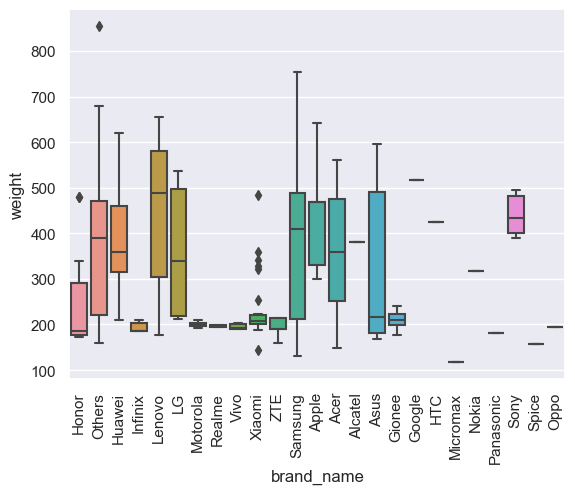

<Figure size 1500x500 with 0 Axes>

In [61]:
#boxplot for brand_name and weight for batteries with energy above 4500mAh
sns.boxplot(larger_battery, x="brand_name", y= "weight")
plt.xticks(rotation=90)
plt.figure(figsize=(15, 5))
plt.show()

Observations: 1. The distribution is skewed to the right. 2. The are outliers present in some of the brands data. 3. The median weights are between

In [62]:
#Q5.How many phones and tablets are available across different brands with a screen size larger than 6 inches?
#6 inches = 15.24cm

larger_screen = udata[udata.screen_size > 15.24]
larger_screen.shape
print("A total of", larger_screen.shape[0], "Phones/Tablets with screens larger than 15.24cm or 6 inches.")

A total of 1099 Phones/Tablets with screens larger than 15.24cm or 6 inches.


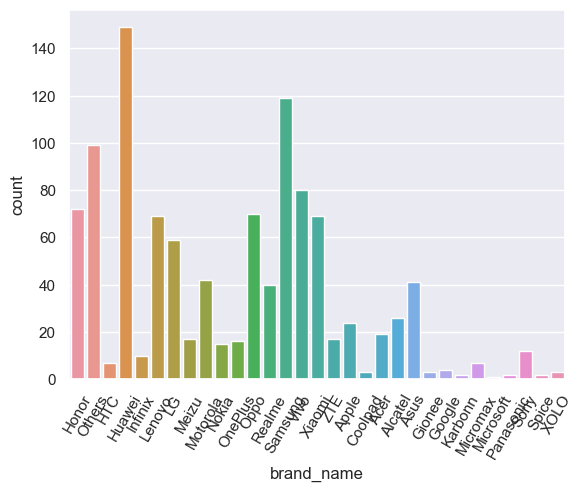

In [63]:
sns.countplot(larger_screen,x='brand_name')
plt.xticks(rotation=60)
plt.show()

In [64]:
#Displaying the total number of screens larger than 15.24 by brand names. 
print(larger_screen['brand_name'].value_counts())

brand_name
Huawei       149
Samsung      119
Others        99
Vivo          80
Honor         72
Oppo          70
Xiaomi        69
Lenovo        69
LG            59
Motorola      42
Asus          41
Realme        40
Alcatel       26
Apple         24
Acer          19
ZTE           17
Meizu         17
OnePlus       16
Nokia         15
Sony          12
Infinix       10
HTC            7
Micromax       7
Google         4
Coolpad        3
Gionee         3
XOLO           3
Karbonn        2
Panasonic      2
Spice          2
Microsoft      1
Name: count, dtype: int64


In [65]:
#Q6 What is the distribution of devices offering greater than 8MP selfie cameras across brands?
selfie_camera = udata[udata.selfie_camera_mp > 8]
print("There are", selfie_camera.shape[0], "Phones/Tablets with selfie cameras greater than 8MP.")

There are 655 Phones/Tablets with selfie cameras greater than 8MP.


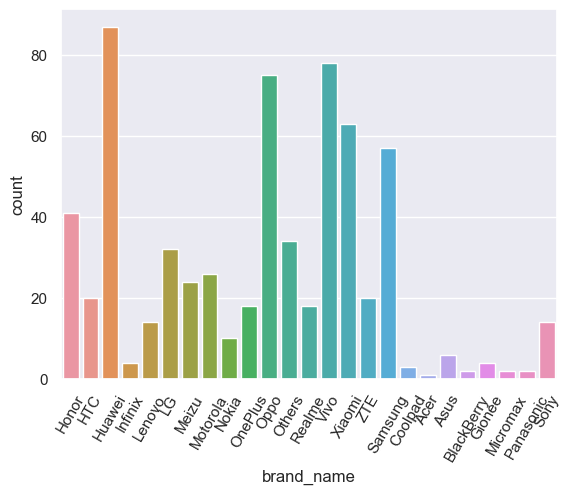

In [66]:
#A countplot displaying gadgets with selfie cameras greater than 8MP
sns.countplot(selfie_camera,x='brand_name')
plt.xticks(rotation=60)
plt.show()

In [67]:
#Displaying the total number of selfie cameras greater than 8MP by brand names. 
print(selfie_camera['brand_name'].value_counts())

brand_name
Huawei        87
Vivo          78
Oppo          75
Xiaomi        63
Samsung       57
Honor         41
Others        34
LG            32
Motorola      26
Meizu         24
HTC           20
ZTE           20
Realme        18
OnePlus       18
Lenovo        14
Sony          14
Nokia         10
Asus           6
Infinix        4
Gionee         4
Coolpad        3
BlackBerry     2
Micromax       2
Panasonic      2
Acer           1
Name: count, dtype: int64


Observation: 1. There are 1,099 phones/Tablets with screens larger than 15.24cm

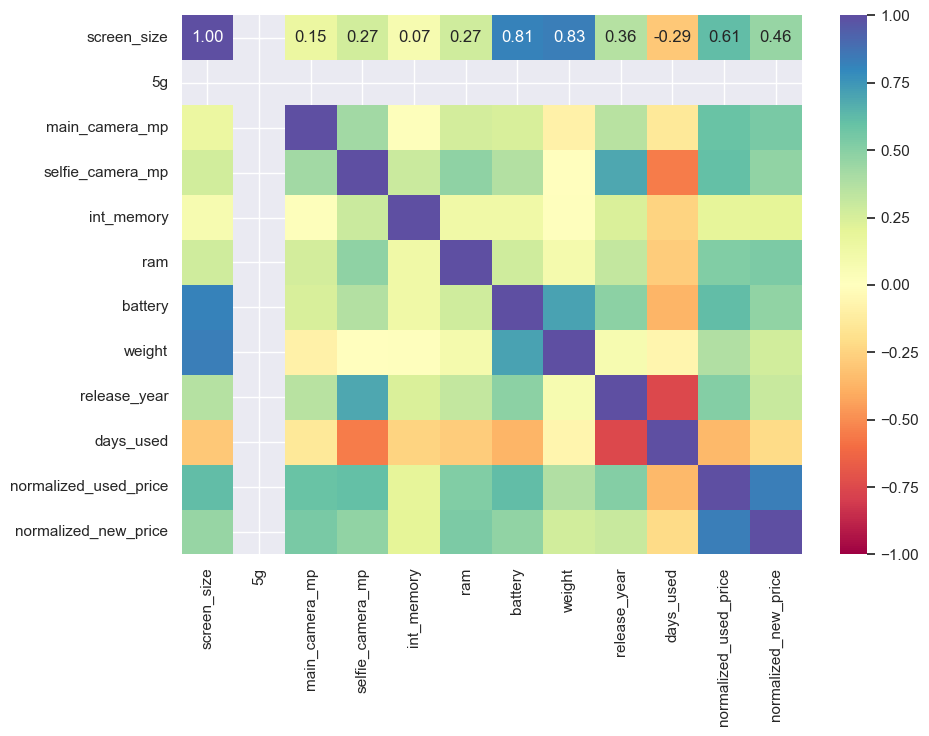

In [68]:
#Q7 Which attributes are highly correlated with the normalized price of a used device?
#Using numerical values to plot a heatmap;
numeric_columns = udata.select_dtypes(include=np.number).columns.tolist()

# correlation heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(udata[numeric_columns].corr(),annot=True,vmin=-1,vmax=1,fmt=".2f",cmap="Spectral")
plt.show()

Observation: 1. The attributes highly correlated with normalized price of a used device are normalized new price, battery,screen size, selfie camera and ram, in that order.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [69]:
#Missing Value Treatment

udata.isnull().sum() #Sum up missing value count

brand_name                  0
os                          0
screen_size                 0
4g                          0
5g                       3454
main_camera_mp            179
selfie_camera_mp            2
int_memory                  4
ram                         4
battery                     6
weight                      7
release_year                0
days_used                   0
normalized_used_price       0
normalized_new_price        0
dtype: int64

Observation: 1. There are missing values in 6 categories, namely, weight, battery, ram, int_memory, selfie_camera_mp and main_camera_mp

In [70]:
#copying the data to avoid  mistakenly messing up with the original data
df = udata.copy()

In [71]:
# fill missing columns with the column median
columns_to_fill = ["main_camera_mp","selfie_camera_mp","int_memory","ram","battery","weight"]

df[columns_to_fill] = df[columns_to_fill].apply(lambda x: x.fillna(x.median()), axis=0)

# checking the number of missing values again after treatment. 
df.isnull().sum()

brand_name                  0
os                          0
screen_size                 0
4g                          0
5g                       3454
main_camera_mp              0
selfie_camera_mp            0
int_memory                  0
ram                         0
battery                     0
weight                      0
release_year                0
days_used                   0
normalized_used_price       0
normalized_new_price        0
dtype: int64

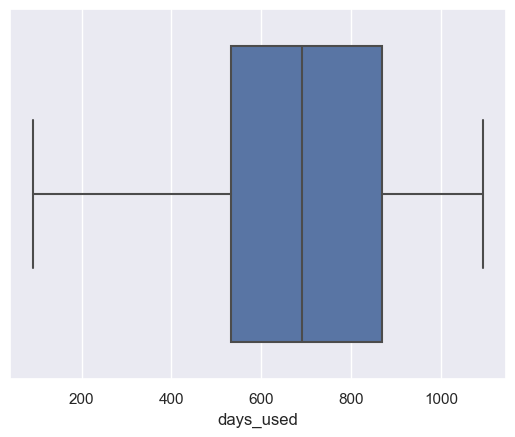

In [72]:
#Outlier detection and treatment. Plotting the boxplot for the 11 numerial categories.
sns.boxplot(df, x ="days_used")
plt.show()

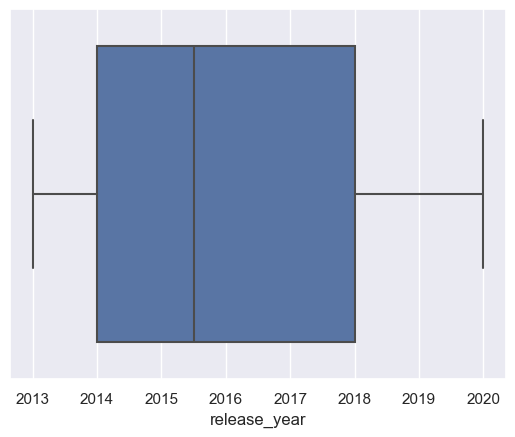

In [73]:
sns.boxplot(df, x ="release_year")
plt.show()

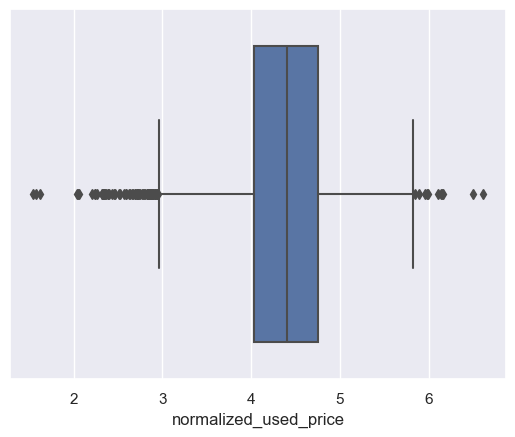

In [74]:
sns.boxplot(df, x ="normalized_used_price")
plt.show()

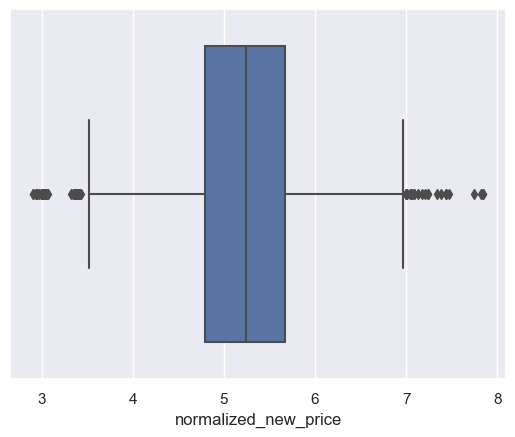

In [75]:
sns.boxplot(df, x ="normalized_new_price")
plt.show()

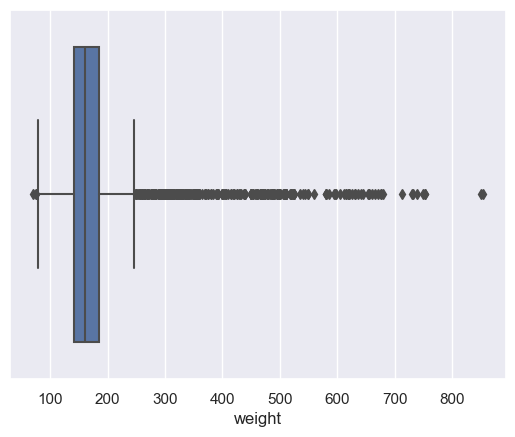

In [76]:
sns.boxplot(df, x ="weight")
plt.show()

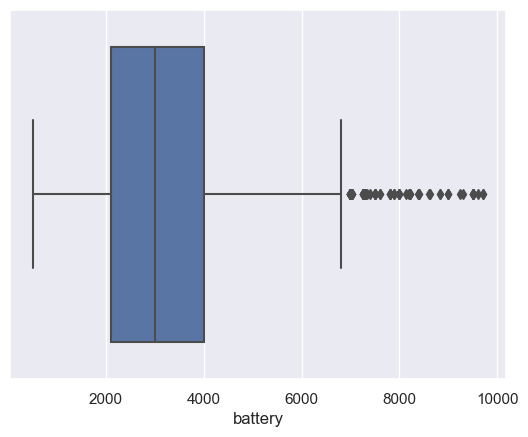

In [77]:
sns.boxplot(df, x ="battery")
plt.show()


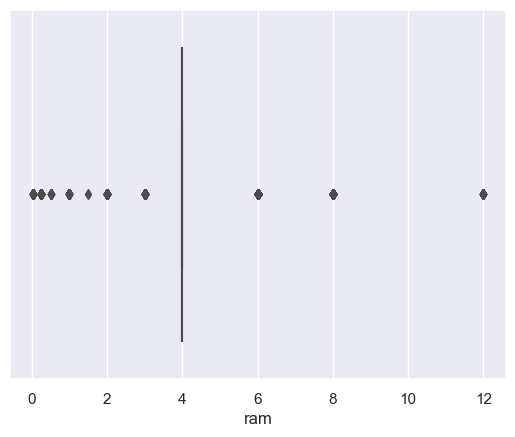

In [78]:
sns.boxplot(df, x ="ram")
plt.show()

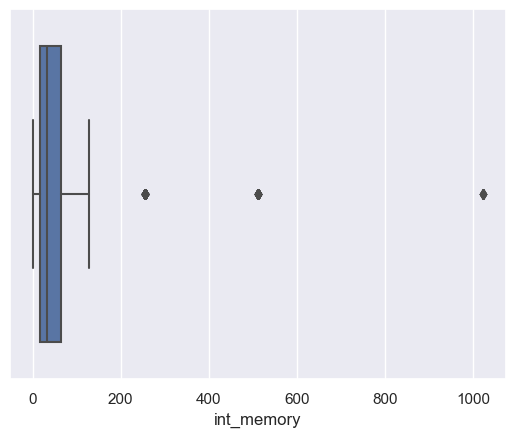

In [79]:
sns.boxplot(df, x ="int_memory")
plt.show()

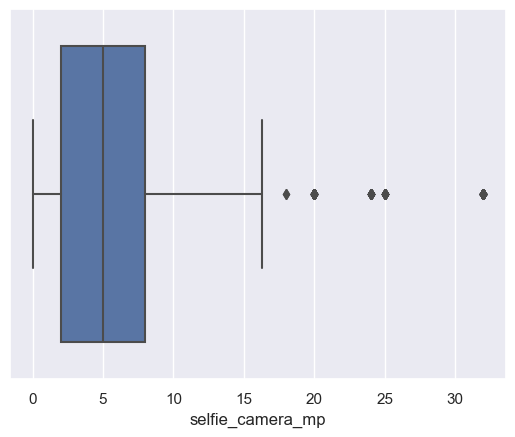

In [80]:
sns.boxplot(df, x ="selfie_camera_mp")
plt.show()

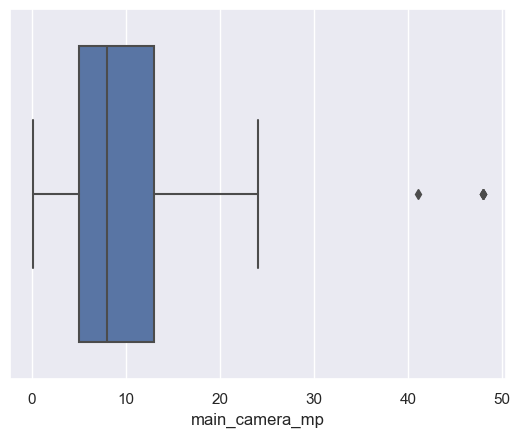

In [81]:
sns.boxplot(df, x ="main_camera_mp")
plt.show()

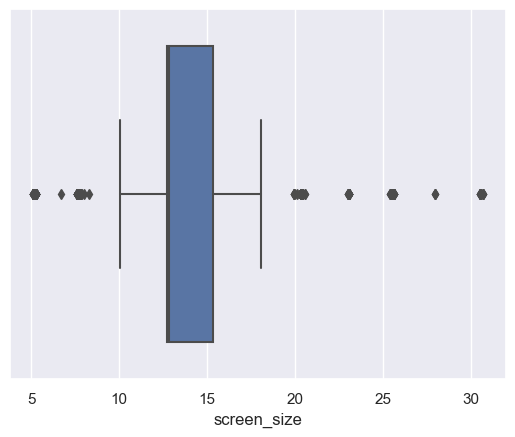

In [82]:
sns.boxplot(df, x ="screen_size")
plt.show()

Observations: 1. There are outliers in all but two of the numerical categories, i.e, release_year and days_used. 2. The outliers will not be treated, since treating the outliers can lead to loss of information.

## EDA

- It is a good idea to explore the data once again after manipulating it.

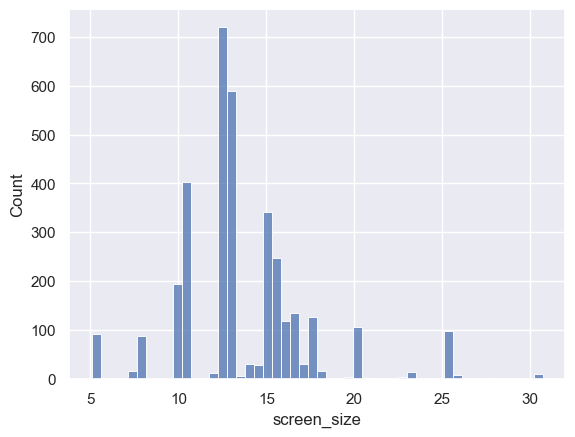

In [83]:
#a histplot for screen_size
sns.histplot(df, x ="screen_size", bins =50)
plt.show()

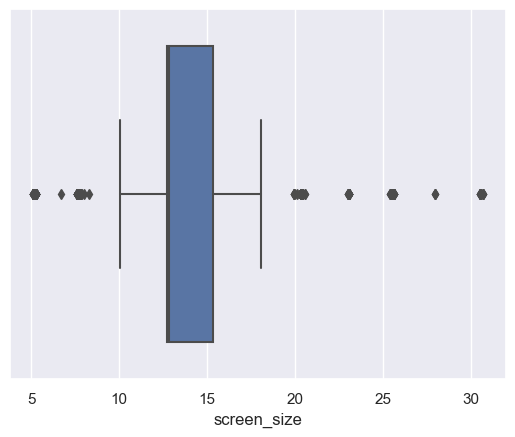

In [84]:
sns.boxplot(df, x ="screen_size")
plt.show()

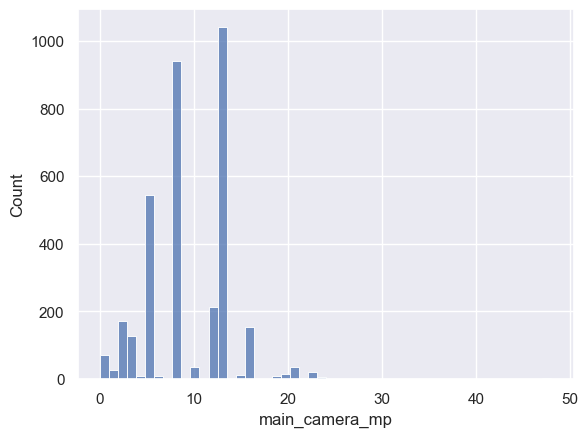

In [85]:
sns.histplot(df, x ="main_camera_mp", bins =50)
plt.show()

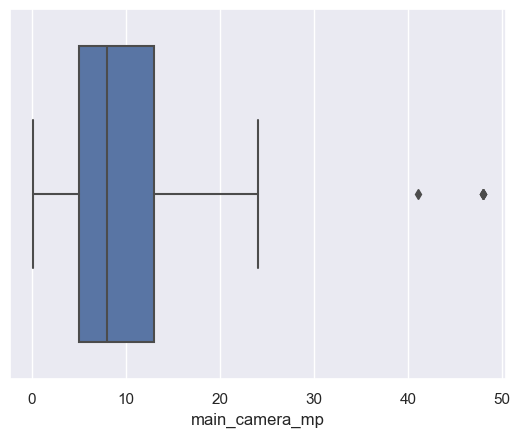

In [86]:
sns.boxplot(df, x ="main_camera_mp")
plt.show()

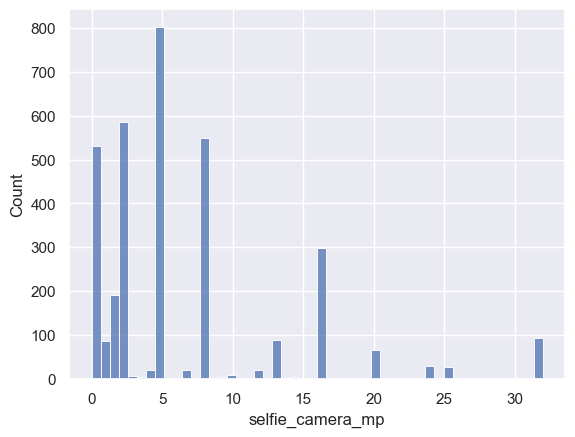

In [87]:
sns.histplot(df, x ="selfie_camera_mp", bins =50)
plt.show()

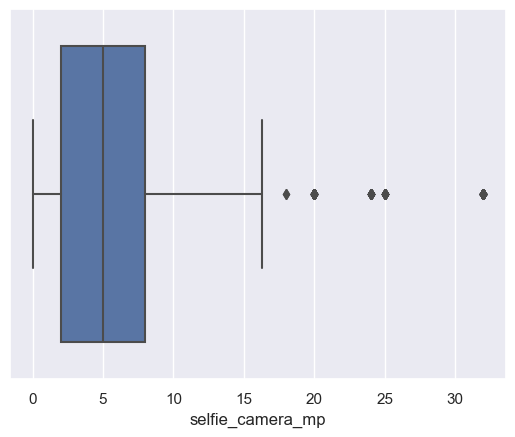

In [88]:
sns.boxplot(df, x ="selfie_camera_mp")
plt.show()

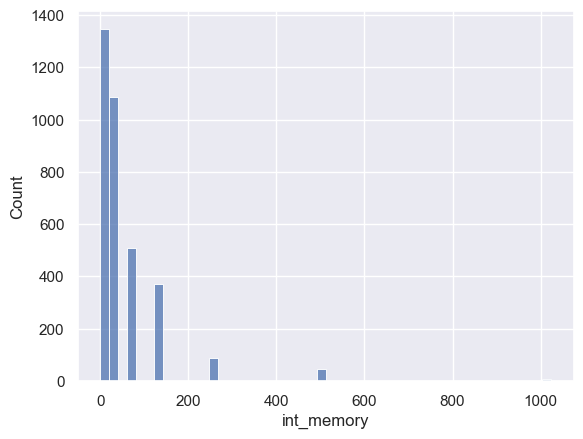

In [89]:
sns.histplot(df, x ="int_memory", bins =50)
plt.show()

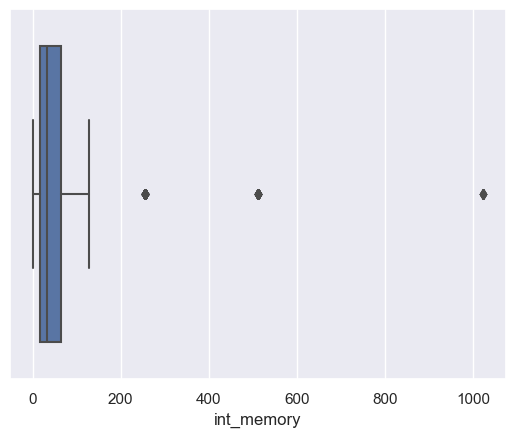

In [90]:
sns.boxplot(df, x ="int_memory")
plt.show()

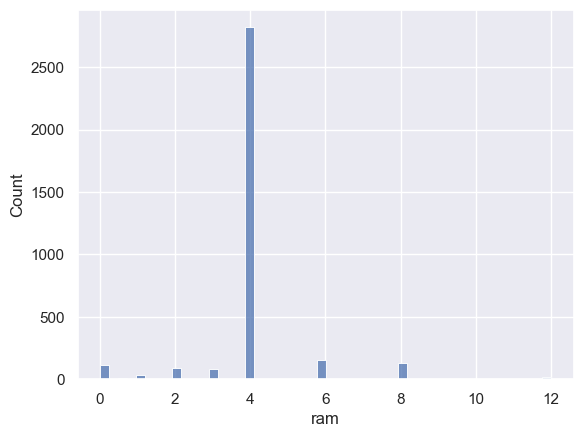

In [91]:
sns.histplot(df, x ="ram", bins =50)
plt.show()

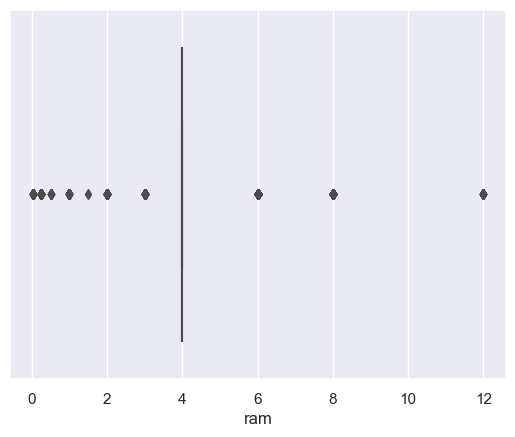

In [92]:
sns.boxplot(df, x ="ram")
plt.show()

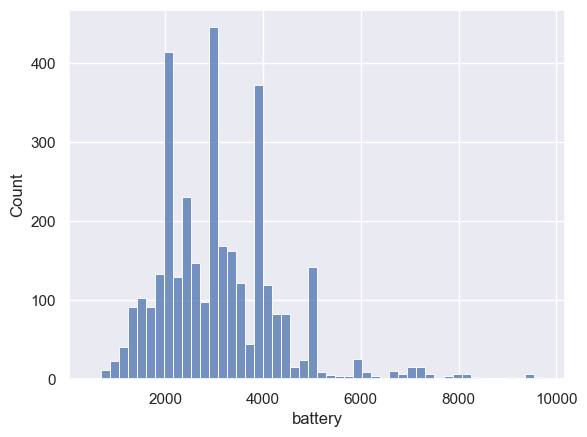

In [93]:
sns.histplot(df, x ="battery", bins =50)
plt.show()

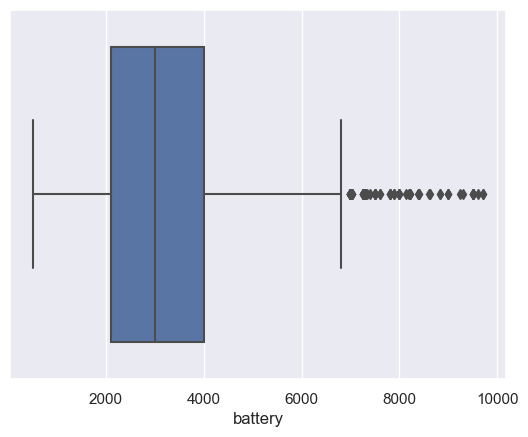

In [94]:
sns.boxplot(df, x ="battery")
plt.show()

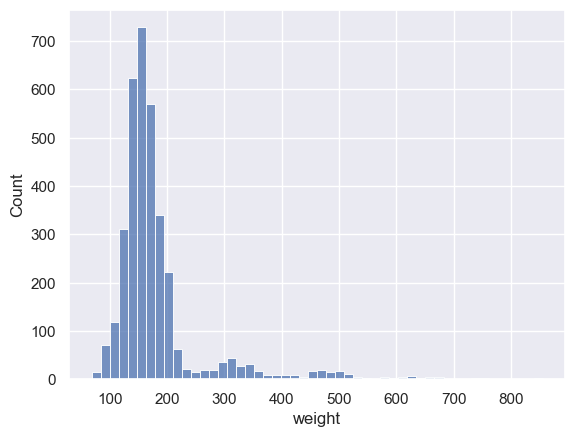

In [95]:
sns.histplot(df, x ="weight", bins =50)
plt.show()

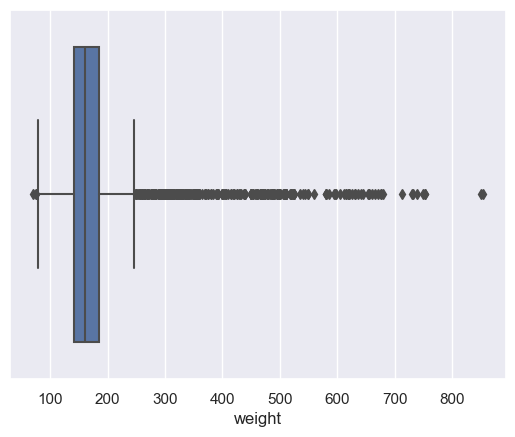

In [96]:
sns.boxplot(df, x ="weight")
plt.show()

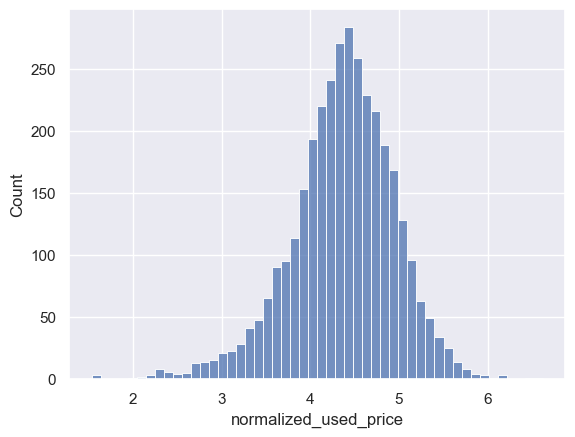

In [97]:
sns.histplot(df, x ="normalized_used_price", bins =50)
plt.show()

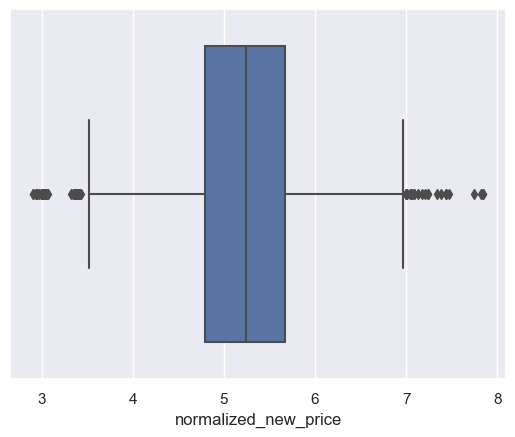

In [98]:
sns.boxplot(df, x ="normalized_new_price")
plt.show()

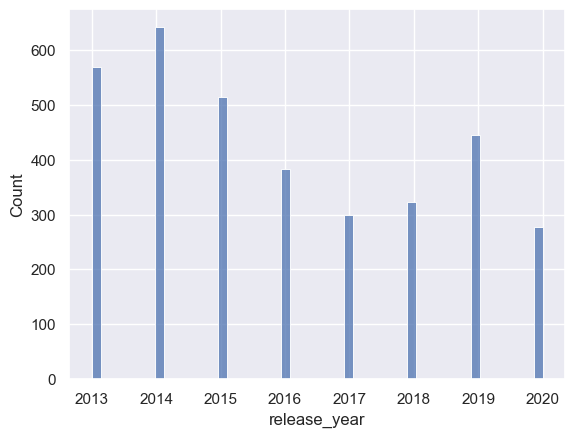

In [99]:
sns.histplot(df, x ="release_year", bins =50)
plt.show()

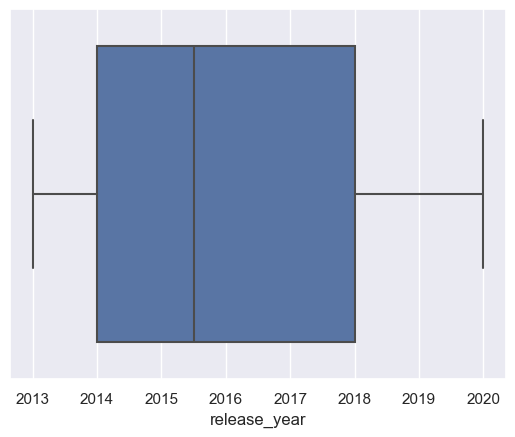

In [100]:
sns.boxplot(df, x ="release_year")
plt.show()

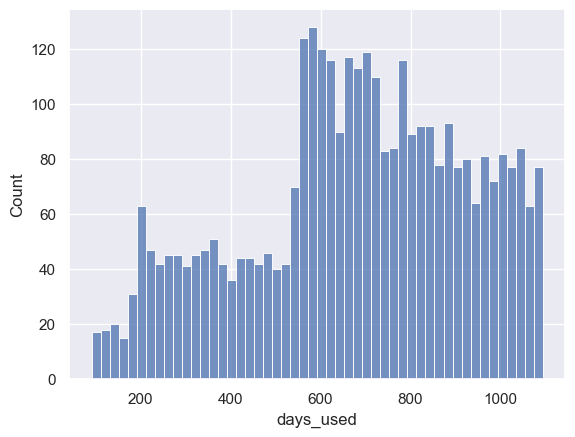

In [101]:
sns.histplot(df, x ="days_used", bins =50)
plt.show()

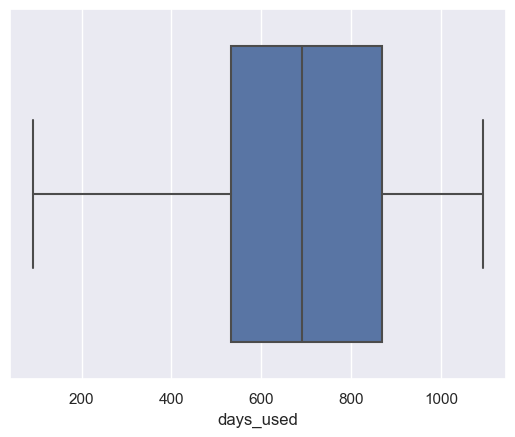

In [102]:
sns.boxplot(df, x ="days_used")
plt.show()

Observations: 
Missing and Infinite Values: There are no missing or infinite values in the key columns.

Feature Distributions: The feature distribution can now be better understood.

Outliers: All remaining outliers have been identified to help improve model performance.

## Model Building - Linear Regression

In [104]:
# Creating dummy variables for categorical columns
df_preprocess_encoded = pd.get_dummies(df, columns=["brand_name", "os", "4g", "5g"], drop_first=True)

# Convert boolean columns to integer
bool_cols = df_preprocess_encoded.select_dtypes(include=['bool']).columns
df_preprocess_encoded[bool_cols] = df_preprocess_encoded[bool_cols].astype(int)

# Check the result
df_preprocess_encoded.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,...,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes
0,14.50,13.00,5.00,64.00,3.00,3020.00,146.00,2020,127,4.31,...,0,0,0,0,0,0,0,0,0,1
1,17.30,13.00,16.00,128.00,8.00,4300.00,213.00,2020,325,5.16,...,0,0,0,0,0,0,0,0,0,1
2,16.69,13.00,8.00,128.00,8.00,4200.00,213.00,2020,162,5.11,...,0,0,0,0,0,0,0,0,0,1
3,25.50,13.00,8.00,64.00,6.00,7250.00,480.00,2020,345,5.14,...,0,0,0,0,0,0,0,0,0,1
4,15.32,13.00,8.00,64.00,3.00,5000.00,185.00,2020,293,4.39,...,0,0,0,0,0,0,0,0,0,1


In [105]:
X = df_preprocess_encoded.drop(["normalized_used_price"], axis=1)
y = df_preprocess_encoded["normalized_used_price"] ##Target Variable.

print(X.head())
print(y.head())

   screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  battery  \
0        14.50           13.00              5.00       64.00 3.00  3020.00   
1        17.30           13.00             16.00      128.00 8.00  4300.00   
2        16.69           13.00              8.00      128.00 8.00  4200.00   
3        25.50           13.00              8.00       64.00 6.00  7250.00   
4        15.32           13.00              8.00       64.00 3.00  5000.00   

   weight  release_year  days_used  normalized_new_price  ...  \
0  146.00          2020        127                  4.72  ...   
1  213.00          2020        325                  5.52  ...   
2  213.00          2020        162                  5.88  ...   
3  480.00          2020        345                  5.63  ...   
4  185.00          2020        293                  4.95  ...   

   brand_name_Sony  brand_name_Spice  brand_name_Vivo  brand_name_XOLO  \
0                0                 0                0             

In [106]:
# let's add the intercept to data
X = sm.add_constant(X)

In [107]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [108]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


In [109]:
import numpy as np
import statsmodels.api as sm

# Example data
# x_train = pd.DataFrame({
#     "feature1": [1, 2, 3, 4, 5, float('inf')],
#     "feature2": [2, 3, 4, 5, 6, 7]
# })
# y_train = pd.Series([1, 2, 3, 4, 5, 6])

# Convert infinite values to NaNs
x_train = x_train.replace([np.inf, -np.inf], np.nan)

# Drop rows with NaNs in either x_train or y_train
x_train = x_train.dropna()
y_train = y_train[x_train.index]

# Add a constant term to the independent variables matrix
x_train = sm.add_constant(x_train)

# Fit the OLS model
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())


                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     274.4
Date:                   Fri, 12 Jul 2024   Prob (F-statistic):               0.00
Time:                           22:59:49   Log-Likelihood:                 123.27
No. Observations:                   2417   AIC:                            -150.5
Df Residuals:                       2369   BIC:                             127.4
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


Observations: R-squared: 0.845 suggests that the model explains the percentage variance in the dependent variable, which is a strong fit. Adj. R-squared: 0.842 is also strong and very close to the R-squared, indicating that most variables contribute meaningfully to the model. 
F-statistic and Prob (F-statistic): Here it is significant (p-value 0), suggesting that the model is a better fit than an intercept-only model. 
Coefficients: The coefficients tell us the amount of change in the dependent variable per one-unit change in an independent variable, holding other variables constant. For instance, normalized_new_price has a coefficient of 0.4310, which is significant (p < 0.001). 
P>|t|: This column shows the p-value for the hypothesis test that each coefficient is different from zero (no effect). A low p-value (< 0.05) suggests that the effect is likely not due to

## Model Performance Check

In [110]:
##We will be using metric functions defined in sklearn for RMSE, MAE, and  R2 .
#We will define a function to calculate MAPE and adjusted  R2.
#We will create a function which will print out all the above metrics in one go.

# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [111]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23,0.18,0.84,0.84,4.33


In [112]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error

# Example test data
# x_test = pd.DataFrame({
#     "feature1": [1, 2, np.nan, 4, 5],
#     "feature2": [2, 3, 4, 5, np.nan]
# })
# y_test = pd.Series([1, 2, 3, 4, np.nan])

# Check for NaN values in x_test and y_test
print("NaNs in x_test:\n", x_test.isna().sum())
print("NaNs in y_test:\n", y_test.isna().sum())

# Drop rows with NaNs in either x_test or y_test
x_test = x_test.dropna()
y_test = y_test[x_test.index]

# Alternatively, you can impute the NaNs instead of dropping them
# x_test_clean = x_test.fillna(x_test.mean())
# y_test_clean = y_test.fillna(y_test.mean())

# Add a constant term to the independent variables matrix
x_test = sm.add_constant(x_test)

# Define the model performance function
def model_performance_regression(model, predictors, target):
    pred = model.predict(predictors)
    r2 = r2_score(target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    return {"R2 Score": r2, "RMSE": rmse}

# Checking model performance on the cleaned test set
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
#print(olsmodel_test_perf)



# checking model performance on test set (seen 30% data)
#print("Test Performance\n")
#olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

NaNs in x_test:
 const                    0
screen_size              0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_new_price     0
brand_name_Alcatel       0
brand_name_Apple         0
brand_name_Asus          0
brand_name_BlackBerry    0
brand_name_Celkon        0
brand_name_Coolpad       0
brand_name_Gionee        0
brand_name_Google        0
brand_name_HTC           0
brand_name_Honor         0
brand_name_Huawei        0
brand_name_Infinix       0
brand_name_Karbonn       0
brand_name_LG            0
brand_name_Lava          0
brand_name_Lenovo        0
brand_name_Meizu         0
brand_name_Micromax      0
brand_name_Microsoft     0
brand_name_Motorola      0
brand_name_Nokia         0
brand_name_OnePlus       0
brand_name_Oppo          0
brand_name_Others        0
brand_name_Panasonic     0
brand_name_

{'R2 Score': 0.8425659970270211, 'RMSE': 0.23829215771425477}

Observations: 1. The training R^2 is 0.84, so the model is not underfitting 2. MAPE on the test set suggests we can predict within 4.49% of the normalised used price. 3. MAE suggests that the model can predict normalised used prices within a mean error of 0.18 on the test data 4. MAE and RMSE on the train and test datasets are comparable, which shows that the model is not overfitting.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

In [113]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [114]:
# Code to check VIF on train data
vif_data = checking_vif(x_train)
print(vif_data)

                  feature        VIF
0                   const 3732848.69
1             screen_size       7.67
2          main_camera_mp       2.07
3        selfie_camera_mp       2.81
4              int_memory       1.35
5                     ram       1.79
6                 battery       4.07
7                  weight       6.38
8            release_year       4.82
9               days_used       2.65
10   normalized_new_price       3.06
11     brand_name_Alcatel       3.40
12       brand_name_Apple      13.00
13        brand_name_Asus       3.33
14  brand_name_BlackBerry       1.63
15      brand_name_Celkon       1.77
16     brand_name_Coolpad       1.46
17      brand_name_Gionee       1.95
18      brand_name_Google       1.32
19         brand_name_HTC       3.41
20       brand_name_Honor       3.34
21      brand_name_Huawei       5.99
22     brand_name_Infinix       1.28
23     brand_name_Karbonn       1.57
24          brand_name_LG       4.85
25        brand_name_Lava       1.71
2

Observations: 1. screen_size: moderate multicollinearity. This could be due to its correlation with other features like battery, weight, etc. 2. weight: moderate multicollinearity. 3. release_year is close to 5, suggesting some degree of multicollinearity. 4. brand_name_Apple, brand_name_Samsung, brand_name_Others, and os_iOS: These have high VIF values, indicating significant multicollinearity.These are dummy variables (aka categorical variables) and should not be dropped since VIF only measures numerical variables. Drop categorical variables during the p-values drop treatement.

In [115]:
# Let's define a function that will help us do this.

def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp


In [116]:
pd.set_option('display.float_format', lambda x: '%.4f' % x) 
# Specifying the columns with high VIF
col_list = ["brand_name_Apple",
    "os_iOS",
    "brand_name_Others",
    "brand_name_Samsung",
    "brand_name_Huawei",
    "brand_name_LG","weight", "screen_size"]

# Checking the effect on model performance after dropping specified columns from train data
res = treating_multicollinearity(x_train, y_train, col_list)
print(res)


                  col  Adj. R-squared after_dropping col  \
0    brand_name_Apple                             0.8418   
1   brand_name_Huawei                             0.8418   
2   brand_name_Others                             0.8418   
3       brand_name_LG                             0.8418   
4              os_iOS                             0.8418   
5  brand_name_Samsung                             0.8418   
6         screen_size                             0.8383   
7              weight                             0.8382   

   RMSE after dropping col  
0                   0.2322  
1                   0.2322  
2                   0.2322  
3                   0.2322  
4                   0.2322  
5                   0.2322  
6                   0.2347  
7                   0.2349  


In [117]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define the function to check VIF
def checking_vif(data):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

# Dropping the column 'screen_size' from training and testing sets
col_to_drop = "screen_size"
x_train2 = x_train.drop(col_to_drop, axis=1)
x_test2 = x_test.drop(col_to_drop, axis=1)

# Check for constant columns
constant_columns = [col for col in x_train2.columns if x_train2[col].nunique() == 1]
#print("Constant columns:", constant_columns)

# Drop constant columns
x_train2 = x_train2.drop(columns=constant_columns)
x_test2 = x_test2.drop(columns=constant_columns)

# Check for perfect multicollinearity
corr_matrix = x_train2.corr().abs()
#print("Correlation matrix:\n", corr_matrix)

# Find pairs of perfectly correlated variables
perfect_corr_pairs = [(i, j) for i in corr_matrix.columns for j in corr_matrix.columns if i != j and corr_matrix.loc[i, j] == 1]
#print("Perfectly correlated pairs:", perfect_corr_pairs)

# Drop one column from each pair of perfectly correlated variables
cols_to_drop = set()
for pair in perfect_corr_pairs:
    cols_to_drop.add(pair[1])
x_train2 = x_train2.drop(columns=list(cols_to_drop))
x_test2 = x_test2.drop(columns=list(cols_to_drop))

# Check VIF again for the updated training data
vif = checking_vif(x_train2)
print("VIF after dropping", col_to_drop)
print(vif)



VIF after dropping screen_size
                  feature      VIF
0          main_camera_mp  10.2256
1        selfie_camera_mp   4.6158
2              int_memory   1.9233
3                     ram  17.0807
4                 battery  24.4733
5                  weight  15.4853
6            release_year 194.8022
7               days_used  14.8801
8    normalized_new_price 172.1338
9      brand_name_Alcatel   3.5264
10       brand_name_Apple  13.0870
11        brand_name_Asus   3.4404
12  brand_name_BlackBerry   1.6399
13      brand_name_Celkon   1.7760
14     brand_name_Coolpad   1.4727
15      brand_name_Gionee   1.9667
16      brand_name_Google   1.3196
17         brand_name_HTC   3.5176
18       brand_name_Honor   3.4491
19      brand_name_Huawei   6.4520
20     brand_name_Infinix   1.2867
21     brand_name_Karbonn   1.5802
22          brand_name_LG   5.1167
23        brand_name_Lava   1.7270
24      brand_name_Lenovo   4.8041
25       brand_name_Meizu   2.2028
26    brand_name_Microma

Observation: 1. After dropping screen_size' from the train dataset the weight VIF score went down to 2.98. So, no need to drop that anymore. 2. Most of the VIF values are below 5 which means multicollinearity has been dealt with.

In [118]:
# Check for NaNs and infinite values
print("NaNs in x_train2:\n", x_train2.isna().sum())
print("Infinite values in x_train2:\n", np.isinf(x_train2).sum())

# Ensure y_train does not have NaNs or infinite values
print("NaNs in y_train:\n", y_train.isna().sum())
print("Infinite values in y_train:\n", np.isinf(y_train).sum())

# Drop or fill NaNs and infinite values in x_train2
x_train2 = x_train2.dropna().replace([np.inf, -np.inf], np.nan).dropna()
y_train = y_train.dropna().replace([np.inf, -np.inf], np.nan).dropna()


olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

NaNs in x_train2:
 main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_new_price     0
brand_name_Alcatel       0
brand_name_Apple         0
brand_name_Asus          0
brand_name_BlackBerry    0
brand_name_Celkon        0
brand_name_Coolpad       0
brand_name_Gionee        0
brand_name_Google        0
brand_name_HTC           0
brand_name_Honor         0
brand_name_Huawei        0
brand_name_Infinix       0
brand_name_Karbonn       0
brand_name_LG            0
brand_name_Lava          0
brand_name_Lenovo        0
brand_name_Meizu         0
brand_name_Micromax      0
brand_name_Microsoft     0
brand_name_Motorola      0
brand_name_Nokia         0
brand_name_OnePlus       0
brand_name_Oppo          0
brand_name_Others        0
brand_name_Panasonic     0
brand_name_Realme        0
brand_name_Samsung       0
brand_nam

Observation: 1.The second OLS model did not see a comparable difference from the adjusted R squared of 0.842 as the variable screen size is dropped.

In [119]:
#Dealing with high P_values
# Initial list of columns from x_train3
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# Setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # Defining the train set
    x_train_aux = predictors[cols]

    # Fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # Getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # Name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'release_year', 'days_used', 'normalized_new_price', 'brand_name_Infinix', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_OnePlus', 'brand_name_Realme', 'brand_name_Xiaomi', 'os_Others', '4g_yes']


In [120]:
# Specifying the refined train and test data
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [121]:
#Fit OLS model on updated dataset after dropping high VIF values of numerical variables and high p-values of categorical (and numerical?)
olsmodel2 = sm.OLS(y_train, x_train3).fit()
print(olsmodel2.summary())

                                  OLS Regression Results                                  
Dep. Variable:     normalized_used_price   R-squared (uncentered):                   0.997
Model:                               OLS   Adj. R-squared (uncentered):              0.997
Method:                    Least Squares   F-statistic:                          5.546e+04
Date:                   Fri, 12 Jul 2024   Prob (F-statistic):                        0.00
Time:                           22:59:51   Log-Likelihood:                          55.868
No. Observations:                   2417   AIC:                                     -81.74
Df Residuals:                       2402   BIC:                                      5.119
Df Model:                             15                                                  
Covariance Type:               nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-

Observation: 1.strong multicollinearity or other numerical problems.

In [122]:
# Checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train3, y_train)
print(olsmodel2_train_perf)

Training Performance

{'R2 Score': 0.8359097022490011, 'RMSE': 0.2364418425298884}


In [123]:
# Checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test3, y_test)
print(olsmodel2_test_perf)

Test Performance

{'R2 Score': 0.835318418353426, 'RMSE': 0.24371541290166343}


In [124]:
#Now we'll check Linearity of variables.
#We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()
df_pred["Actual Values"] = y_train ## Complete the code to store the actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid # residuals
df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.0875,3.8531,0.2344
1525,4.4484,4.6566,-0.2082
1128,4.3154,4.2700,0.0454
3003,4.2821,4.2601,0.0220
2907,4.4564,4.5185,-0.0621


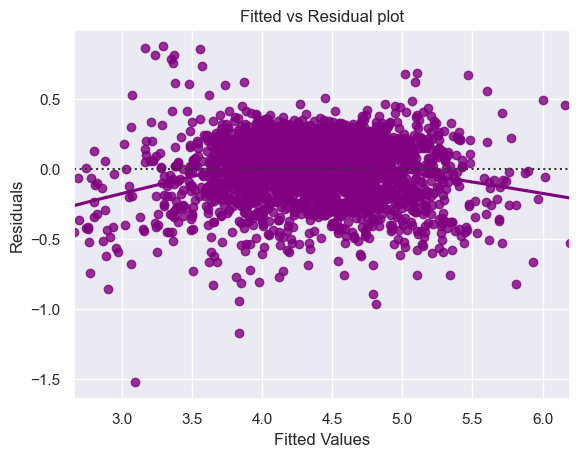

In [125]:
#Plotting the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

Observation: There is no pattern from the residuals and fitted values meaning the assumptions of linearity and independence are satisfied. 
The residuals appear to be randomly distributed around the zero line, suggesting that the model's predictions are unbiased on average across the range of fitted values. This is a good sign for the validity of the OLS regression model.

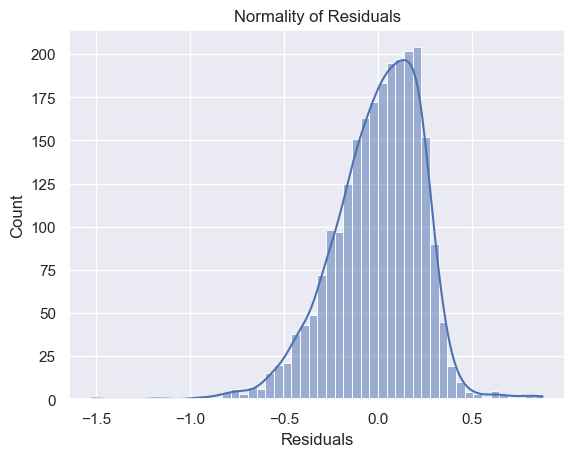

In [126]:
#TEST FOR NORMALITY
# Histogram of Residuals: show if they are normally distributed.
sns.histplot(df_pred, x="Residuals", kde=True)
plt.title("Normality of Residuals")
plt.show()

Observations: 1.From the plot, the distribution of the residuals appears to be roughly bell-shaped, which is a good indicator that they may be normally distributed, as this is a key assumption of linear regression.

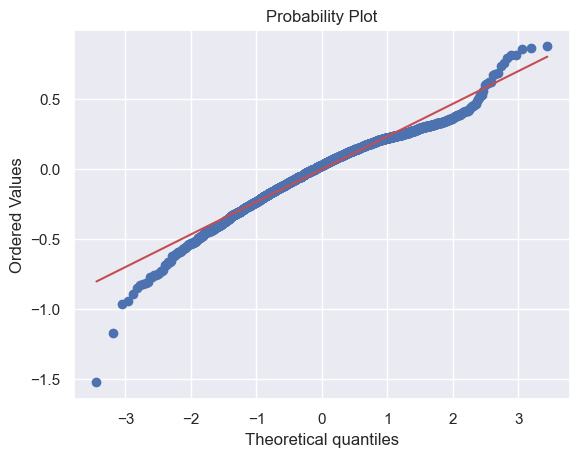

In [127]:
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

Observations: If the points roughly follow the red line (which represents the expected quantiles from a normal distribution), then the data can be considered normally distributed. 
Most of the points seem to follow the line closely, especially in the middle portion (between -1 and 1 in theoretical quantiles), which suggests that the residuals are normally distributed in that range (majority of the data).
There are some deviations from the line at the ends, particularly in the lower left and the upper right of the plot. These deviations indicate that the residuals have heavier tails than a normal distribution, which is a sign of potential outliers or a non-normal distribution in the tails.

In [128]:
## Code check Q-Q plot

stats.probplot(df_pred["Residuals"])  ## Code check Q-Q plot
plt.show()
## Code to check p-value
stats.shapiro(df_pred["Residuals"]) 

ShapiroResult(statistic=0.9707345962524414, pvalue=8.242963351351479e-22)

Observations: 1. Stricly speaking the according to the shapiro test the p-value is less than 0.05 meaning the residuals are not normal. However, the probability plot is mostly linear except the tails and the residual histplot does look normal but a litle skewed to the left.
The statistic value of approximately 0.972 suggests the data may not follow a normal distribution, as this value is less than 1, which would indicate a perfect fit to the normal distribution

In [129]:
#TEST FOR HOMOSCEDASTICITY

import statsmodels.stats.api as sms
from statsmodels.compat import lzip
# Goldfeld-Quandt Test:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3[selected_features])
lzip(name, test)

[('F statistic', 1.022775175255657), ('p-value', 0.34866848626250624)]

Observations: 1. P-value is above 0.05 so the variance of the residuals is symmetrically distributed across the regression line, the data is homoscedacity in nature.

## Final Model

In [130]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [131]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                                  OLS Regression Results                                  
Dep. Variable:     normalized_used_price   R-squared (uncentered):                   0.997
Model:                               OLS   Adj. R-squared (uncentered):              0.997
Method:                    Least Squares   F-statistic:                          5.546e+04
Date:                   Fri, 12 Jul 2024   Prob (F-statistic):                        0.00
Time:                           22:59:54   Log-Likelihood:                          55.868
No. Observations:                   2417   AIC:                                     -81.74
Df Residuals:                       2402   BIC:                                      5.119
Df Model:                             15                                                  
Covariance Type:               nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-

In [132]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



{'R2 Score': 0.8359097022490011, 'RMSE': 0.2364418425298884}

In [133]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



{'R2 Score': 0.835318418353426, 'RMSE': 0.24371541290166343}

Observation: The model is able to explain ~83.06% of the variation in the data. The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting. 
The MAPE on the test set suggests we can predict within 4.5% of the normalized used price.
We can conclude the model olsmodel_final is good for prediction as well as inference purposes.

## Actionable Insights and Recommendations

Conclusions

1**Model Performan**: The final model explains 83.6% of the variation in the data, as indicated by the adjusted R-squared value. This suggests that the linear model is well-suited for predicting the normalized used prices of cell phones and tablets.
   . **Influence of New Pce**: An increase of one unit in the normalized new price results in a 0.44 unit increase in the normalized used price. This indicates that the normalized new price significantly impacts the normalized used price.
3. **Brand and Technology pact**: Phones with 4G capability and Gionee brand phones have lower used prices. This suggests that these phones are less in demand and might be considered for discontinuation

4. **4G and 5Models**: 4G models increase the used price by 0.05 units, while 5G models decrease it by 0.06 units. This shows that 4G models retain more value in the used market compared to 5G mode.

5. **Effect of Age and Rease Year**: Newly released phones tend to have higher used prices. This is expected, as newer phones generally have higher new prices, which positively impacts their used prices. Conversely, older phones have lower used prices, aligning with customer preferences for newer mols.

6. **Key Influenal Factors**: The variables `release_year`, `days_used`, `normalized_new_price`, `brand_name_Gionee`, and whether a phone has 4G or 5G capabilities significantly influence the used price. Longer usage duration typically decreases the used price, likely due to concerns about the phone's condition. The presence of 5G, often found in newer models, tends to increase the uinventory decisions.

Recommendations

1. Focus on Value-Retaining Features: Recell should prioritize phones with higher capacity cameras and storage space, as these features tend to retain value better in the used market. Additionally, focusing on popular brands like Huawei and Samsung is advisable due to the low value counts of other less common brands, making it difficult to draw statistical inferences from them.

2. Future Data Collection on Customer Demographics: Collecting data on the age of customers purchasing products can provide valuable insights. For example, Gen Z customers may prefer 5G or newer models.

3. Income Data Collection: Gathering data on the income levels of customers could help identify trends in preferences among higher-income customers, allowing for better-targeted marketing and inventory decisions.

___